In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from scipy.stats import norm, multinomial

np.random.seed(42)

# Population Scenarios

With the predictive model, changes to the synthetic population will be made to represent scenarios for policy changes and their impact on the dropout rate.

In [9]:
df = pd.read_csv('../data/synpop_feat.csv')
df

,age,sector,nationality,gender,education,year,state,dropped_out,Emp_Age_25_34_Share,Emp_Age_35_49_Share,...,Unemp_No_Vocational_Edu_Share,Unemp_Promotion_Share,Unemp_Rate_Men,Unemp_Rate_Total,Unemp_Rate_Women,Unemp_Total_Count,Unemp_Vocational_Training_Share,Unemp_Women_Share,nominal_wage_index,nominal_wage_growth_rate
0,17-Jährige,Industrie und Handel,Deutsche,weiblich,Ohne Hauptschulabschluss,2013,Baden-Württemberg,0,22.1,39.1,...,44.6,0.2,5.2,5.4,5.7,227794.0,41.3,47.6,84.3,0.7
1,18-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0,22.1,39.1,...,44.6,0.2,5.2,5.4,5.7,227794.0,41.3,47.6,84.3,0.7
2,21-Jährige,Industrie und Handel,Deutsche,weiblich,Hochschul- oder Fachhochschulreife,2013,Baden-Württemberg,0,22.1,39.1,...,44.6,0.2,5.2,5.4,5.7,227794.0,41.3,47.6,84.3,0.7
3,23-Jährige,Handwerk,Deutsche,weiblich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0,22.1,39.1,...,44.6,0.2,5.2,5.4,5.7,227794.0,41.3,47.6,84.3,0.7
4,17-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0,22.1,39.1,...,44.6,0.2,5.2,5.4,5.7,227794.0,41.3,47.6,84.3,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351995,19-Jährige,Industrie und Handel,Deutsche,männlich,Hochschul- oder Fachhochschulreife,2023,Thüringen,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.6,6.6
351996,20-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2023,Thüringen,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.6,6.6
351997,21-Jährige,Handwerk,Deutsche,weiblich,Hauptschulabschluss,2023,Thüringen,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.6,6.6
351998,21-Jährige,Industrie und Handel,Deutsche,männlich,Im Ausland erworbener Abschluss (nicht zuorden...,2023,Thüringen,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.6,6.6


In [10]:
print(df.columns)

Index(['age', 'sector', 'nationality', 'gender', 'education', 'year', 'state',
       'dropped_out', 'Emp_Age_25_34_Share', 'Emp_Age_35_49_Share',
       'Emp_Age_50_Plus_Share', 'Emp_Age_Under_25_Share', 'Emp_Bachelor_Share',
       'Emp_Diplom_Magister_StateExam_Share', 'Emp_Foreign_Share', 'Emp_Index',
       'Emp_Master_Tech_Share', 'Emp_No_Vocational_Edu_Share',
       'Emp_PartTime_Share', 'Emp_Promotion_Share',
       'Emp_Recognized_Vocational_Edu_Share', 'Emp_Sector_Agriculture_Share',
       'Emp_Sector_Construction_Share',
       'Emp_Sector_Manufacturing_Machinery_Share',
       'Emp_Sector_Manufacturing_Other_Share',
       'Emp_Sector_Manufacturing_Share',
       'Emp_Sector_Services_Edu_Culture_Share',
       'Emp_Sector_Services_Finance_Insurance_Share',
       'Emp_Sector_Services_Health_Social_Share',
       'Emp_Sector_Services_Other_Share',
       'Emp_Sector_Services_Public_Admin_Share', 'Emp_Sector_Services_Share',
       'Emp_Sector_Services_Trade_Share',
       

In [11]:
numerical_cols = ['Emp_Age_25_34_Share', 'Emp_Age_35_49_Share',
       'Emp_Age_50_Plus_Share', 'Emp_Age_Under_25_Share', 'Emp_Bachelor_Share',
       'Emp_Diplom_Magister_StateExam_Share', 'Emp_Foreign_Share', 'Emp_Index',
       'Emp_Master_Tech_Share', 'Emp_No_Vocational_Edu_Share',
       'Emp_PartTime_Share', 'Emp_Promotion_Share',
       'Emp_Recognized_Vocational_Edu_Share', 'Emp_Sector_Agriculture_Share',
       'Emp_Sector_Construction_Share',
       'Emp_Sector_Manufacturing_Machinery_Share',
       'Emp_Sector_Manufacturing_Other_Share',
       'Emp_Sector_Manufacturing_Share',
       'Emp_Sector_Services_Edu_Culture_Share',
       'Emp_Sector_Services_Finance_Insurance_Share',
       'Emp_Sector_Services_Health_Social_Share',
       'Emp_Sector_Services_Other_Share',
       'Emp_Sector_Services_Public_Admin_Share', 'Emp_Sector_Services_Share',
       'Emp_Sector_Services_Trade_Share',
       'Emp_Sector_Services_Transport_Com_Share', 'Emp_Total_Count',
       'Emp_Vocational_Edu_Unknown_Share', 'Emp_Women_Share',
       'Unemp_Age_25_34_Share', 'Unemp_Age_35_49_Share',
       'Unemp_Age_50_Plus_Share', 'Unemp_Age_Under_25_Share',
       'Unemp_Bachelor_Share', 'Unemp_Diplom_Magister_Master_StateExam_Share',
       'Unemp_Edu_Unknown_Share', 'Unemp_Foreign_Share',
       'Unemp_Index_2013_100', 'Unemp_LongTerm_Share',
       'Unemp_No_Vocational_Edu_Share', 'Unemp_Promotion_Share',
       'Unemp_Rate_Men', 'Unemp_Rate_Total', 'Unemp_Rate_Women',
       'Unemp_Total_Count', 'Unemp_Vocational_Training_Share',
       'Unemp_Women_Share', 'nominal_wage_index', 'nominal_wage_growth_rate']

categorical_cols = ['age', 'sector', 'nationality', 'gender', 'education']

df['year_numeric'] = df['year']

In [12]:
df = df[df['year'] != 2023].copy()


--- NaN Inspection: Counts of NaNs in specified columns ---
Column 'nominal_wage_index': 60000 NaNs
Column 'nominal_wage_growth_rate': 20000 NaNs

--- NaN Inspection: Breakdown by Year and State ---

NaNs in 'nominal_wage_index' by year and state:
state  Mecklenburg-Vorpommern  Sachsen-Anhalt  Schleswig-Holstein
year                                                             
2013                     2000            2000                2000
2014                     2000            2000                2000
2015                     2000            2000                2000
2016                     2000            2000                2000
2017                     2000            2000                2000
2018                     2000            2000                2000
2019                     2000            2000                2000
2020                     2000            2000                2000
2021                     2000            2000                2000
2022                     

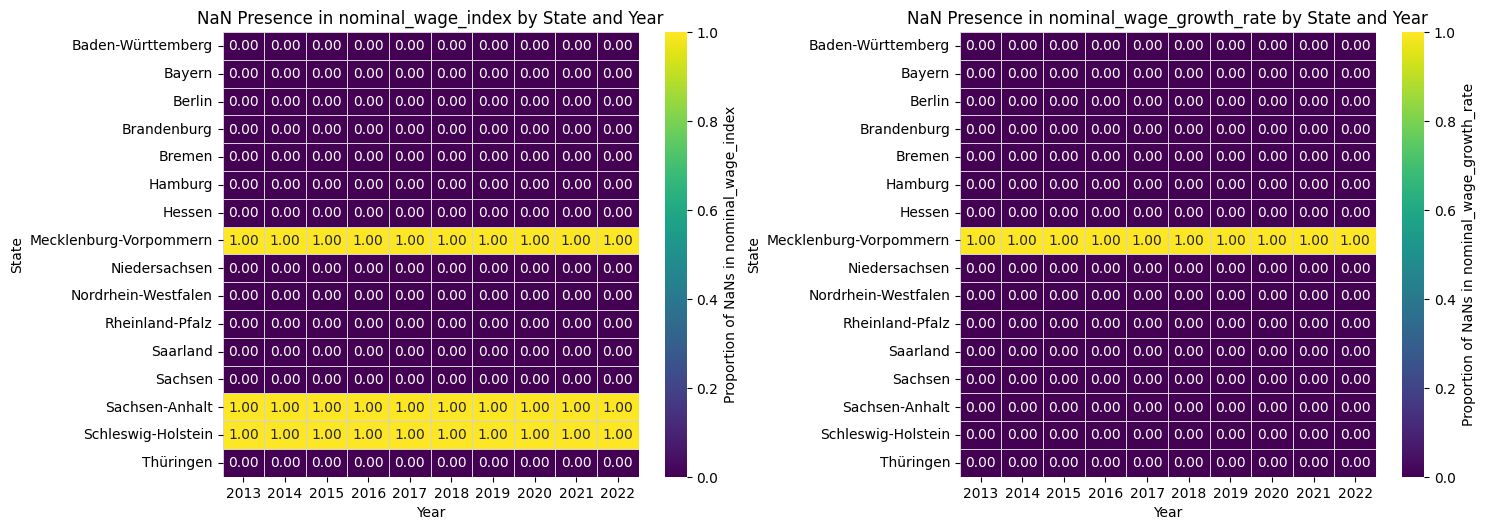


--- Overall NaN Presence Heatmap (selected columns) ---


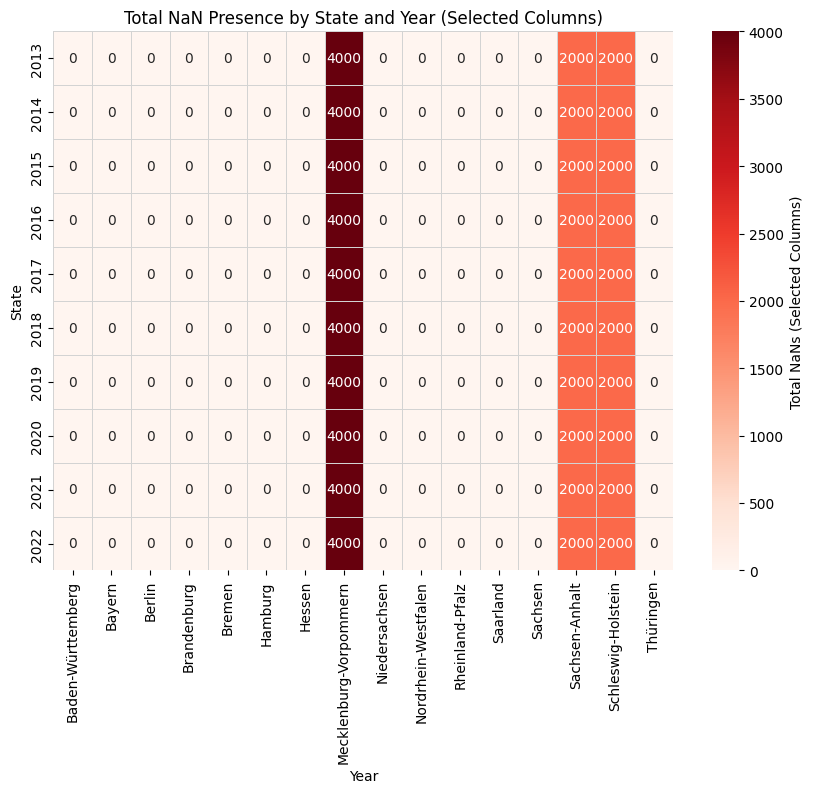

In [13]:
# --- NaN Inspection ---

print("\n--- NaN Inspection: Counts of NaNs in specified columns ---")
nan_columns = ['nominal_wage_index', 'nominal_wage_growth_rate']
for col in nan_columns:
    print(f"Column '{col}': {df[col].isna().sum()} NaNs")

print("\n--- NaN Inspection: Breakdown by Year and State ---")
for col in nan_columns:
    print(f"\nNaNs in '{col}' by year and state:")
    # Group by year and state, count NaNs
    nan_counts = df[df[col].isna()].groupby(['year', 'state']).size().unstack(fill_value=0)
    if nan_counts.empty:
        print(f"  No NaNs found for column '{col}'.")
    else:
        print(nan_counts)

# --- Heatmap Visualization ---

print("\n--- Heatmap Visualization of NaNs ---")

# Create a boolean DataFrame indicating NaNs
# We'll select the relevant columns and pivot for the heatmap
# For this heatmap, let's focus on the specified columns and overall NaN presence
# by year and state.

# Columns of interest for the heatmap
cols_for_heatmap = ['nominal_wage_index', 'nominal_wage_growth_rate']

# Create a DataFrame indicating True for NaN, False otherwise
nan_df = df[cols_for_heatmap].isna()

# Group by 'year' and 'state' and calculate the mean of NaNs (0 for False, 1 for True)
# This will give the proportion of NaNs for each combination, or 1 if all are NaN
nan_proportion_by_year_state = df.groupby(['year', 'state'])[cols_for_heatmap].apply(lambda x: x.isna().mean()).reset_index()

# Now, let's create a heatmap for each of the specific columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_for_heatmap):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid based on number of columns
    pivot_table = nan_proportion_by_year_state.pivot(index='state', columns='year', values=col)

    sns.heatmap(pivot_table, cmap='viridis', cbar_kws={'label': f'Proportion of NaNs in {col}'}, linewidths=.5, linecolor='lightgray', annot=True, fmt=".2f")
    plt.title(f'NaN Presence in {col} by State and Year')
    plt.xlabel('Year')
    plt.ylabel('State')

plt.tight_layout()
plt.show()

# Alternative heatmap: showing total NaNs per year/state across *all* columns or a selection
print("\n--- Overall NaN Presence Heatmap (selected columns) ---")
# Count total NaNs for the selected columns per year-state group
total_nan_counts_per_group = df.groupby(['year', 'state'])[cols_for_heatmap].apply(lambda x: x.isna().sum().sum()).unstack(fill_value=0)

plt.figure(figsize=(10, 7))
sns.heatmap(total_nan_counts_per_group, cmap='Reds', cbar_kws={'label': 'Total NaNs (Selected Columns)'}, linewidths=.5, linecolor='lightgray', annot=True, fmt="d")
plt.title('Total NaN Presence by State and Year (Selected Columns)')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

***
# Extrapolating from given Trends

In [14]:
def extrapolate_numerical_features(df_historical, numerical_cols, target_year):
    """
    Extrapolates numerical features using simple linear regression per state.
    Includes a fallback to national trend/average if state-specific data is insufficient.

    Args:
        df_historical (pd.DataFrame): The input DataFrame for historical data (2013-2022).
        numerical_cols (list): List of numerical column names to extrapolate.
        target_year (int): The year to extrapolate to.

    Returns:
        dict: A dictionary where keys are states and values are dictionaries
              containing extrapolated numerical values for each feature.
    """
    extrapolated_numerical_data = {}
    all_states = df_historical['state'].unique()

    print("\n--- Extrapolating Numerical Features (with NaN handling) ---")
    for state in all_states:
        extrapolated_numerical_data[state] = {}
        state_df = df_historical[df_historical['state'] == state].copy()

        for col in numerical_cols:
            yearly_avg = state_df.groupby('year_numeric')[col].mean().reset_index()
            yearly_avg.dropna(subset=[col], inplace=True) # Drop NaNs before regression

            if len(yearly_avg) < 2:
                # Fallback strategy: Use national trend/average
                print(f"  Insufficient historical data for '{state}' in '{col}'. Falling back to national trend.")

                # Calculate national (or overall available states) trend
                national_yearly_avg = df_historical.groupby('year_numeric')[col].mean().reset_index()
                national_yearly_avg.dropna(subset=[col], inplace=True)

                if len(national_yearly_avg) >= 2:
                    X_national = national_yearly_avg[['year_numeric']]
                    y_national = national_yearly_avg[col]
                    national_model = LinearRegression()
                    national_model.fit(X_national, y_national)
                    extrapolated_value = national_model.predict(np.array([[target_year]]))[0]
                    print(f"    Used national trend for '{col}'. Projected: {extrapolated_value:.2f}")
                elif not national_yearly_avg.empty:
                    # Fallback to last known national average if no national trend possible
                    extrapolated_value = national_yearly_avg[col].iloc[-1]
                    print(f"    Used last known national average for '{col}'. Value: {extrapolated_value:.2f}")
                else:
                    extrapolated_value = np.nan # No historical data even at national level
                    print(f"    No historical data (even national) for '{col}'. Setting to NaN.")
            else:
                X = yearly_avg[['year_numeric']]
                y = yearly_avg[col]
                model = LinearRegression()
                model.fit(X, y)
                extrapolated_value = model.predict(np.array([[target_year]]))[0]

            # Ensure values stay within reasonable bounds
            if '_Share' in col or '_Rate' in col or 'growth_rate' in col:
                extrapolated_value = np.clip(extrapolated_value, 0, 100)
            if 'Count' in col:
                extrapolated_value = max(0, extrapolated_value)

            extrapolated_numerical_data[state][col] = float(extrapolated_value)

    return extrapolated_numerical_data

In [15]:
def extrapolate_categorical_distributions(df_historical, categorical_cols, target_year):
    """
    Extrapolates categorical distributions by modeling the trend of proportions per state.
    Operates on a historical DataFrame (df_historical) that excludes the problematic year.

    Args:
        df_historical (pd.DataFrame): The input DataFrame for historical data.
        categorical_cols (list): List of categorical column names to extrapolate.
        target_year (int): The year to extrapolate to.

    Returns:
        dict: A dictionary where keys are states and values are dictionaries
              containing projected proportions for each categorical feature.
    """
    extrapolated_categorical_data = {}
    states = df_historical['state'].unique()

    print("\n--- Extrapolating Categorical Distributions ---")
    for state in states:
        extrapolated_categorical_data[state] = {}
        state_df = df_historical[df_historical['state'] == state].copy()

        for col in categorical_cols:
            # Drop rows with NaNs in the current categorical column for accurate counts
            yearly_counts = state_df.dropna(subset=[col]).groupby(['year_numeric', col]).size().unstack(fill_value=0)

            if yearly_counts.empty:
                print(f"  Warning: No valid historical data for state '{state}', column '{col}'. Skipping.")
                extrapolated_categorical_data[state][col] = {}
                continue

            yearly_proportions = yearly_counts.div(yearly_counts.sum(axis=1), axis=0)

            extrapolated_categorical_data[state][col] = {}
            categories = yearly_proportions.columns

            projected_proportions_for_year = {}
            for category in categories:
                category_proportions = yearly_proportions[[category]].reset_index()

                if len(category_proportions) < 2:
                    if not category_proportions.empty:
                        projected_prop = category_proportions[category].iloc[-1]
                    else:
                        projected_prop = 0.0
                else:
                    X = category_proportions[['year_numeric']]
                    y = category_proportions[category]

                    model = LinearRegression()
                    model.fit(X, y)

                    projected_prop = model.predict(np.array([[target_year]]))[0]
                    projected_prop = np.clip(projected_prop, 0.0, 1.0)

                projected_proportions_for_year[category] = projected_prop

            total_projected_prop = sum(projected_proportions_for_year.values())
            
            if total_projected_prop > 0:
                for category in projected_proportions_for_year:
                    extrapolated_categorical_data[state][col][category] = \
                        projected_proportions_for_year[category] / total_projected_prop
            else:
                print(f"  Warning: All projected proportions for state '{state}', column '{col}' sum to zero. Distributing evenly among historical categories.")
                num_categories = len(categories)
                if num_categories > 0:
                    for category in categories:
                        extrapolated_categorical_data[state][col][category] = 1 / num_categories
                else:
                    print(f"  Warning: No categories found for state '{state}', column '{col}'. Skipping.")
                    extrapolated_categorical_data[state][col] = {}

    return extrapolated_categorical_data



In [16]:
def generate_synthetic_population(
    df_original_for_structure,
    extrapolated_numerical_data,
    extrapolated_categorical_data,
    numerical_cols,
    categorical_cols,
    target_year,
    num_individuals_per_state=None
):
    """
    Generates a new synthetic population for the target year.

    Args:
        df_original_for_structure (pd.DataFrame): The original DataFrame (including 2023)
                                                  to get the full list of unique categories
                                                  and overall standard deviations for sampling.
        extrapolated_numerical_data (dict): Extrapolated numerical values.
        extrapolated_categorical_data (dict): Extrapolated categorical distributions.
        numerical_cols (list): List of numerical column names.
        categorical_cols (list): List of categorical column names.
        target_year (int): The year for which to generate the synthetic population.
        num_individuals_per_state (int, optional): The number of synthetic individuals
                                                  to generate per state. If None,
                                                  it will try to match the last year's count
                                                  for that state in the *historical* data.

    Returns:
        pd.DataFrame: A DataFrame representing the new synthetic population.
    """
    synthetic_population_list = []
    states = list(extrapolated_numerical_data.keys())

    print(f"\n--- Generating Synthetic Population for {target_year} ---")

    for state in states:
        state_historical_df = df_original_for_structure[
            (df_original_for_structure['state'] == state) & (df_original_for_structure['year'] != 2023)
        ].copy()

        if num_individuals_per_state is None:
            last_historical_year = state_historical_df['year'].max() if not state_historical_df.empty else None
            if last_historical_year is not None:
                current_state_individuals_count = state_historical_df[state_historical_df['year'] == last_historical_year].shape[0]
            else:
                current_state_individuals_count = 0

            if current_state_individuals_count == 0:
                print(f"  Warning: No historical individuals found for state '{state}'. Defaulting to 1000 individuals.")
                num_generate = 1000
            else:
                num_generate = current_state_individuals_count
        else:
            num_generate = num_individuals_per_state

        print(f"  Generating {num_generate} individuals for state: {state}")

        state_synthetic_data = []

        state_num_extrap = extrapolated_numerical_data.get(state, {})
        state_cat_extrap = extrapolated_categorical_data.get(state, {})

        # Sample Numerical Features
        synthetic_numerical_samples = {}
        for col in numerical_cols:
            # Get standard deviation: Try state-specific first, then overall historical
            col_std = state_historical_df[col].dropna().std() if not state_historical_df.empty else np.nan
            if pd.isna(col_std) or col_std == 0:
                # Fallback to overall standard deviation from the *entire historical_df*
                col_std = df_original_for_structure[df_original_for_structure['year'] != 2023][col].dropna().std()
                if pd.isna(col_std) or col_std == 0:
                    col_std = 0.01 # Minimum std to allow sampling

            mean = state_num_extrap.get(col, df_original_for_structure[col].mean()) # Fallback to global mean
            std = col_std

            samples = norm.rvs(loc=mean, scale=std, size=num_generate)

            if '_Share' in col or '_Rate' in col or 'growth_rate' in col:
                samples = np.clip(samples, 0, 100)
            if 'Count' in col:
                samples = np.clip(samples, 0, np.inf)

            synthetic_numerical_samples[col] = samples

        # Sample Categorical Features
        synthetic_categorical_samples = {col: [] for col in categorical_cols}
        for i in range(num_generate):
            for col in categorical_cols:
                proportions_dict = state_cat_extrap.get(col, {})
                if not proportions_dict:
                    overall_proportions_df = df_original_for_structure[df_original_for_structure['year'] != 2023].dropna(subset=[col])
                    overall_proportions = overall_proportions_df[col].value_counts(normalize=True).to_dict()
                    proportions_dict = overall_proportions if overall_proportions else {}

                categories = list(proportions_dict.keys())
                probabilities = list(proportions_dict.values())

                if not categories:
                    synthetic_categorical_samples[col].append(None)
                    continue

                prob_sum = sum(probabilities)
                if prob_sum == 0:
                    probabilities = [1.0 / len(categories)] * len(categories)
                else:
                    probabilities = [p / prob_sum for p in probabilities]

                sampled_category = np.random.choice(categories, p=probabilities)
                synthetic_categorical_samples[col].append(sampled_category)

        state_synthetic_df = pd.DataFrame(synthetic_categorical_samples)
        for col in numerical_cols:
            state_synthetic_df[col] = synthetic_numerical_samples[col]

        state_synthetic_df['state'] = state
        state_synthetic_df['year'] = target_year
        state_synthetic_df['year_numeric'] = target_year

        synthetic_population_list.append(state_synthetic_df)

    synthetic_population_df = pd.concat(synthetic_population_list, ignore_index=True)
    return synthetic_population_df

In [17]:
# --- Main Execution ---
target_year = 2025

# 1. Extrapolate numerical features using the historical_df
extrapolated_num_data = extrapolate_numerical_features(df, numerical_cols, target_year)

# 2. Extrapolate categorical distributions using the historical_df
extrapolated_cat_data = extrapolate_categorical_distributions(df, categorical_cols, target_year)

# Print a sample of extrapolated data to verify
print("\n--- Sample Extrapolated Numerical Data (Mecklenburg-Vorpommern for check) ---")
if 'Mecklenburg-Vorpommern' in extrapolated_num_data:
    for k, v in extrapolated_num_data['Mecklenburg-Vorpommern'].items():
        if k in ['nominal_wage_index', 'nominal_wage_growth_rate']:
             print(f"  {k}: {v:.2f}")
else:
    print("  No extrapolated numerical data for Mecklenburg-Vorpommern.")


print("\n--- Sample Extrapolated Numerical Data (Sachsen-Anhalt for check) ---")
if 'Sachsen-Anhalt' in extrapolated_num_data:
    for k, v in extrapolated_num_data['Sachsen-Anhalt'].items():
        if k in ['nominal_wage_index', 'nominal_wage_growth_rate']:
             print(f"  {k}: {v:.2f}")
else:
    print("  No extrapolated numerical data for Sachsen-Anhalt.")


# 3. Generate new synthetic population
synthetic_df = generate_synthetic_population(
    df_original_for_structure=df,
    extrapolated_numerical_data=extrapolated_num_data,
    extrapolated_categorical_data=extrapolated_cat_data,
    numerical_cols=numerical_cols,
    categorical_cols=categorical_cols,
    target_year=target_year
)

print(f"\n--- Generated Synthetic Population for {target_year} ---")
print(synthetic_df.head())
print(f"\nTotal synthetic individuals generated: {len(synthetic_df)}")
print("\nSynthetic DataFrame Info:")
synthetic_df.info()

# Optional: Verify distributions in synthetic data
print("\n--- Verification: Synthetic Nominal Wage Index in Mecklenburg-Vorpommern (Mean) ---")
if 'Mecklenburg-Vorpommern' in synthetic_df['state'].unique():
    print(synthetic_df[synthetic_df['state'] == 'Mecklenburg-Vorpommern']['nominal_wage_index'].mean())
    # Compare with extrapolated_num_data['Mecklenburg-Vorpommern']['nominal_wage_index']


--- Extrapolating Numerical Features (with NaN handling) ---


/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/sit

  Insufficient historical data for 'Mecklenburg-Vorpommern' in 'nominal_wage_index'. Falling back to national trend.
    Used national trend for 'nominal_wage_index'. Projected: 106.02
  Insufficient historical data for 'Mecklenburg-Vorpommern' in 'nominal_wage_growth_rate'. Falling back to national trend.
    Used national trend for 'nominal_wage_growth_rate'. Projected: 3.12


/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/sit

  Insufficient historical data for 'Sachsen-Anhalt' in 'nominal_wage_index'. Falling back to national trend.
    Used national trend for 'nominal_wage_index'. Projected: 106.02
  Insufficient historical data for 'Schleswig-Holstein' in 'nominal_wage_index'. Falling back to national trend.
    Used national trend for 'nominal_wage_index'. Projected: 106.02


/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/sit


--- Extrapolating Categorical Distributions ---


/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jojo/productivity/nf-ds/finappr/FinApprenticeship/.venv/lib/python3.11/sit


--- Sample Extrapolated Numerical Data (Mecklenburg-Vorpommern for check) ---
  nominal_wage_index: 106.02
  nominal_wage_growth_rate: 3.12

--- Sample Extrapolated Numerical Data (Sachsen-Anhalt for check) ---
  nominal_wage_index: 106.02
  nominal_wage_growth_rate: 4.40

--- Generating Synthetic Population for 2025 ---
  Generating 2000 individuals for state: Baden-Württemberg
  Generating 2000 individuals for state: Bayern
  Generating 2000 individuals for state: Berlin
  Generating 2000 individuals for state: Brandenburg
  Generating 2000 individuals for state: Bremen
  Generating 2000 individuals for state: Hamburg
  Generating 2000 individuals for state: Hessen
  Generating 2000 individuals for state: Mecklenburg-Vorpommern
  Generating 2000 individuals for state: Niedersachsen
  Generating 2000 individuals for state: Nordrhein-Westfalen
  Generating 2000 individuals for state: Rheinland-Pfalz
  Generating 2000 individuals for state: Saarland
  Generating 2000 individuals for st

In [18]:
synthetic_df

,age,sector,nationality,gender,education,Emp_Age_25_34_Share,Emp_Age_35_49_Share,Emp_Age_50_Plus_Share,Emp_Age_Under_25_Share,Emp_Bachelor_Share,...,Unemp_Rate_Total,Unemp_Rate_Women,Unemp_Total_Count,Unemp_Vocational_Training_Share,Unemp_Women_Share,nominal_wage_index,nominal_wage_growth_rate,state,year,year_numeric
0,17-Jährige,Handwerk,Deutsche,weiblich,Hauptschulabschluss,23.686044,28.790278,38.071060,6.459228,6.419974,...,4.296145,3.467488,232911.294259,35.783499,44.209382,106.943648,3.703046,Baden-Württemberg,2025,2025
1,unter 17 Jahre,Handwerk,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,23.478429,29.859672,39.646394,6.551029,5.875498,...,3.902438,4.343116,243939.143023,33.026238,43.343504,104.444187,3.000792,Baden-Württemberg,2025,2025
2,24 Jahre und mehr,Freie Berufe,Deutsche,männlich,Ohne Hauptschulabschluss,23.735407,28.554010,39.739556,6.491913,6.258758,...,4.960404,4.157535,242741.584675,32.591957,44.568613,108.348477,4.379342,Baden-Württemberg,2025,2025
3,19-Jährige,Handwerk,Ausländer,weiblich,Hochschul- oder Fachhochschulreife,24.021612,29.530300,40.600035,6.566787,7.285070,...,4.241305,3.294374,174758.447346,35.726354,45.718912,97.676049,2.276713,Baden-Württemberg,2025,2025
4,20-Jährige,Freie Berufe,Deutsche,weiblich,Hauptschulabschluss,23.447077,26.334863,37.118306,6.630220,7.936561,...,4.054005,4.092672,237945.856353,28.133550,43.742083,111.634209,3.782904,Baden-Württemberg,2025,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,19-Jährige,Handwerk,Deutsche,weiblich,Realschul- oder vergleichbarer Abschluss,19.110509,35.363145,42.032711,6.120856,3.477094,...,6.130374,4.629370,36146.545226,43.802217,42.467121,107.201769,2.380873,Thüringen,2025,2025
31996,18-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,18.399805,34.957889,42.222271,5.928335,4.121948,...,1.202827,4.001690,61353.157043,51.356144,42.062213,114.204290,4.350938,Thüringen,2025,2025
31997,20-Jährige,Freie Berufe,Deutsche,männlich,Hochschul- oder Fachhochschulreife,17.210105,34.640927,40.834734,5.870497,3.496295,...,6.157136,3.393029,8781.672523,52.778375,46.484111,109.071610,3.599827,Thüringen,2025,2025
31998,20-Jährige,Freie Berufe,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,16.985802,35.624137,39.802638,5.109689,2.590223,...,2.693497,4.025118,36301.082892,44.588320,40.678965,116.759995,3.534160,Thüringen,2025,2025


***
# Scenario Analysis

In [19]:
# --- Modified Extrapolation Functions to return a callable model/function per state/feature ---

def get_numerical_extrapolation_models(df_historical, numerical_cols):
    """
    Trains linear regression models for each numerical feature per state (and national fallback).
    Returns a dictionary of functions for prediction.
    """
    numerical_extrapolation_models = {}
    all_states = df_historical['state'].unique()

    print("\n--- Training Numerical Extrapolation Models ---")
    for state in all_states:
        numerical_extrapolation_models[state] = {}
        state_df = df_historical[df_historical['state'] == state].copy()

        for col in numerical_cols:
            yearly_avg = state_df.groupby('year_numeric')[col].mean().reset_index()
            yearly_avg.dropna(subset=[col], inplace=True) # Drop NaNs before regression

            if len(yearly_avg) >= 2:
                X = yearly_avg[['year_numeric']] # This is a DataFrame
                y = yearly_avg[col]
                model = LinearRegression()
                model.fit(X, y)
                # MODIFICATION HERE: Pass a DataFrame to predict
                numerical_extrapolation_models[state][col] = lambda yr, m=model: m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0]
            else:
                numerical_extrapolation_models[state][col] = 'fallback_needed'

    # Calculate and store national fallback models for columns that need it
    national_models = {}
    for col in numerical_cols:
        national_yearly_avg = df_historical.groupby('year_numeric')[col].mean().reset_index()
        national_yearly_avg.dropna(subset=[col], inplace=True)
        if len(national_yearly_avg) >= 2:
            X_national = national_yearly_avg[['year_numeric']]
            y_national = national_yearly_avg[col]
            national_model = LinearRegression()
            national_model.fit(X_national, y_national)
            # MODIFICATION HERE: Pass a DataFrame to predict
            national_models[col] = lambda yr, m=national_model: m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0]
        elif not national_yearly_avg.empty:
            last_national_value = national_yearly_avg[col].iloc[-1]
            national_models[col] = lambda yr, val=last_national_value: val
        else:
            national_models[col] = lambda yr: np.nan

    # Fill in fallback_needed placeholders
    for state in all_states:
        for col in numerical_cols:
            if numerical_extrapolation_models[state][col] == 'fallback_needed':
                if col in national_models:
                    numerical_extrapolation_models[state][col] = national_models[col]
                else:
                    numerical_extrapolation_models[state][col] = lambda yr: np.nan

    return numerical_extrapolation_models




def get_categorical_extrapolation_models(df_historical, categorical_cols):
    """
    Trains models for categorical distributions per state.
    Returns a dictionary of functions for proportion prediction.
    """
    categorical_extrapolation_models = {}
    all_states = df_historical['state'].unique()

    print("\n--- Training Categorical Extrapolation Models ---")
    for state in all_states:
        categorical_extrapolation_models[state] = {}
        state_df = df_historical[df_historical['state'] == state].copy()

        for col in categorical_cols:
            yearly_counts = state_df.dropna(subset=[col]).groupby(['year_numeric', col]).size().unstack(fill_value=0)

            if yearly_counts.empty:
                categorical_extrapolation_models[state][col] = {}
                continue

            yearly_proportions = yearly_counts.div(yearly_counts.sum(axis=1), axis=0)
            categories = yearly_proportions.columns
            category_proportion_models = {}

            for category in categories:
                category_proportions_df = yearly_proportions[[category]].reset_index()

                if len(category_proportions_df) >= 2:
                    X = category_proportions_df[['year_numeric']]
                    y = category_proportions_df[category]
                    model = LinearRegression()
                    model.fit(X, y)
                    # MODIFICATION HERE: Pass a DataFrame to predict
                    category_proportion_models[category] = lambda yr, m=model: np.clip(m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0], 0.0, 1.0)
                elif not category_proportions_df.empty:
                    last_prop = category_proportions_df[category].iloc[-1]
                    category_proportion_models[category] = lambda yr, prop=last_prop: prop
                else:
                    category_proportion_models[category] = lambda yr: 0.0 # No data for this category
                    
            # Store a function that calculates all proportions for a given year and normalizes them
            def get_proportions_for_year(year, cat_models=category_proportion_models, all_cats=categories):
                projected_props = {cat: cat_models.get(cat, lambda x: 0.0)(year) for cat in all_cats}
                total_prop = sum(projected_props.values())
                if total_prop > 0:
                    return {cat: prop / total_prop for cat, prop in projected_props.items()}
                else: # Fallback to even distribution if all projected props are zero
                    if all_cats.empty: return {}
                    return {cat: 1.0 / len(all_cats) for cat in all_cats}

            categorical_extrapolation_models[state][col] = get_proportions_for_year

    return categorical_extrapolation_models


def generate_single_year_population(
    df_original_for_structure,
    numerical_extrapolation_models,
    categorical_extrapolation_models,
    numerical_cols,
    categorical_cols,
    target_year,
    num_individuals_per_state=None,
    scenario_manipulations=None,
    target_states_to_generate=None # NEW PARAMETER
):
    """
    Generates a single year's synthetic population, allowing for feature manipulations
    and selective state generation.

    Args:
        df_original_for_structure (pd.DataFrame): Original DataFrame (including 2023)
                                                  to get full categories and overall stds.
        numerical_extrapolation_models (dict): Trained functions for numerical extrapolation.
        categorical_extrapolation_models (dict): Trained functions for categorical extrapolation.
        numerical_cols (list): List of numerical column names.
        categorical_cols (list): List of categorical column names.
        target_year (int): The year for which to generate the synthetic population.
        num_individuals_per_state (int, optional): Number of individuals per state.
        scenario_manipulations (dict, optional): Dictionary of manipulations for the target_year.
        target_states_to_generate (list, optional): List of states for which to generate individuals.
                                                    If None, generates for all states present in models.

    Returns:
        pd.DataFrame: A DataFrame for the synthetic population of the target_year.
    """
    synthetic_population_list = []
    
    # Determine which states to generate for
    states_to_process = target_states_to_generate
    if states_to_process is None:
        # Default to all states for which we have models
        states_to_process = list(numerical_extrapolation_models.keys())
    else:
        # Filter to only include states for which we have models
        states_to_process = [s for s in states_to_process if s in numerical_extrapolation_models]
        if not states_to_process:
            print("Warning: No valid states to generate for based on provided target_states_to_generate.")
            return pd.DataFrame() # Return empty DataFrame if no states can be processed

    print(f"\n--- Generating Synthetic Population for {target_year} ---")

    for state in states_to_process: # LOOP HERE IS CHANGED
        state_historical_df = df_original_for_structure[
            (df_original_for_structure['state'] == state) & (df_original_for_structure['year'] != 2023)
        ].copy()

        # Determine num_generate
        if num_individuals_per_state is None:
            last_historical_year = state_historical_df['year'].max() if not state_historical_df.empty else None
            if last_historical_year is not None:
                current_state_individuals_count = state_historical_df[state_historical_df['year'] == last_historical_year].shape[0]
            else:
                current_state_individuals_count = 0
            num_generate = current_state_individuals_count if current_state_individuals_count > 0 else 1000
        else:
            num_generate = num_individuals_per_state

        print(f"  Generating {num_generate} individuals for state: {state}")

        state_synthetic_data = {}

        # 1. Sample Numerical Features
        for col in numerical_cols:
            extrapolated_mean = numerical_extrapolation_models[state][col](target_year)

            if scenario_manipulations and col in scenario_manipulations:
                if state in scenario_manipulations[col]:
                    extrapolated_mean = scenario_manipulations[col][state]
                elif 'All' in scenario_manipulations[col]:
                    extrapolated_mean = scenario_manipulations[col]['All']

            col_std = state_historical_df[col].dropna().std() if not state_historical_df.empty else np.nan
            if pd.isna(col_std) or col_std == 0:
                col_std = df_original_for_structure[df_original_for_structure['year'] != 2023][col].dropna().std()
                if pd.isna(col_std) or col_std == 0:
                    col_std = 0.01

            samples = norm.rvs(loc=extrapolated_mean, scale=col_std, size=num_generate)
            if '_Share' in col or '_Rate' in col or 'growth_rate' in col:
                samples = np.clip(samples, 0, 100)
            if 'Count' in col:
                samples = np.clip(samples, 0, np.inf)

            state_synthetic_data[col] = samples

        # 2. Sample Categorical Features
        for col in categorical_cols:
            proportions_dict = categorical_extrapolation_models[state][col](target_year)

            if scenario_manipulations and col in scenario_manipulations:
                if state in scenario_manipulations[col] and isinstance(scenario_manipulations[col][state], dict):
                    manipulated_props = scenario_manipulations[col][state]
                    proportions_dict = manipulated_props
                elif 'All' in scenario_manipulations[col] and isinstance(scenario_manipulations[col]['All'], dict):
                    manipulated_props = scenario_manipulations[col]['All']
                    proportions_dict = manipulated_props

            if not proportions_dict:
                 overall_proportions_df = df_original_for_structure[df_original_for_structure['year'] != 2023].dropna(subset=[col])
                 overall_proportions = overall_proportions_df[col].value_counts(normalize=True).to_dict()
                 proportions_dict = overall_proportions if overall_proportions else {}

            categories = list(proportions_dict.keys())
            probabilities = list(proportions_dict.values())

            if not categories:
                state_synthetic_data[col] = [None] * num_generate
                continue

            prob_sum = sum(probabilities)
            if prob_sum == 0:
                probabilities = [1.0 / len(categories)] * len(categories)
            else:
                probabilities = [p / prob_sum for p in probabilities]

            sampled_categories = np.random.choice(categories, size=num_generate, p=probabilities)
            state_synthetic_data[col] = sampled_categories

        state_synthetic_df = pd.DataFrame(state_synthetic_data)
        state_synthetic_df['state'] = state
        state_synthetic_df['year'] = target_year
        state_synthetic_df['year_numeric'] = target_year

        synthetic_population_list.append(state_synthetic_df)

    synthetic_population_df = pd.concat(synthetic_population_list, ignore_index=True)
    return synthetic_population_df

def generate_scenario_populations(
    df_original,
    historical_df,
    numerical_cols,
    categorical_cols_for_extrapolation,
    start_year,
    end_year,
    num_individuals_per_state=None,
    scenario_manipulations_over_time=None,
    target_states_to_generate=None # NEW PARAMETER
):
    if scenario_manipulations_over_time is None:
        scenario_manipulations_over_time = {}

    all_scenario_populations = []

    numerical_models = get_numerical_extrapolation_models(historical_df, numerical_cols)
    categorical_models = get_categorical_extrapolation_models(historical_df, categorical_cols_for_extrapolation)

    for year in range(start_year, end_year + 1):
        print(f"\n--- Processing Year: {year} ---")
        current_year_manipulations = scenario_manipulations_over_time.get(year, {})

        yearly_synthetic_df = generate_single_year_population(
            df_original_for_structure=df_original,
            numerical_extrapolation_models=numerical_models,
            categorical_extrapolation_models=categorical_models,
            numerical_cols=numerical_cols,
            categorical_cols=categorical_cols_for_extrapolation,
            target_year=year,
            num_individuals_per_state=num_individuals_per_state,
            scenario_manipulations=current_year_manipulations,
            target_states_to_generate=target_states_to_generate # PASS NEW PARAMETER
        )
        all_scenario_populations.append(yearly_synthetic_df)

    return pd.concat(all_scenario_populations, ignore_index=True)



***
# Fluid Scenario Builders

In [22]:
def build_numerical_growth_scenario(feature_name, start_value=None, annual_increase=None,
                                     start_year=2025, end_year=2035, scope='All', base_extrapolated_value=None):
    """
    Builds a scenario dictionary for a numerical feature with linear growth.

    Args:
        feature_name (str): The name of the numerical feature (e.g., 'nominal_wage_growth_rate').
        start_value (float, optional): The absolute value for the feature in the start_year.
                                       If None, uses base_extrapolated_value + annual_increase for start year.
        annual_increase (float, optional): The absolute increase per year.
        start_year (int): The first year of the scenario.
        end_year (int): The last year of the scenario.
        scope (str or list): 'All' or a list of specific states to apply the manipulation to.
        base_extrapolated_value (float, optional): The starting value for the feature if start_value is not given.
                                                   This would usually be the BAU extrapolated value for start_year.
                                                   Crucial for relative changes.

    Returns:
        dict: A partial scenario_manipulations_over_time dictionary.
    """
    scenario = {}
    for year in range(start_year, end_year + 1):
        target_value = start_value
        if target_value is None:
            if base_extrapolated_value is not None and annual_increase is not None:
                target_value = base_extrapolated_value + (year - start_year) * annual_increase
            else:
                raise ValueError("Either start_value or (base_extrapolated_value and annual_increase) must be provided.")

        manipulation = {}
        if scope == 'All':
            manipulation['All'] = target_value
        elif isinstance(scope, list):
            for state in scope:
                manipulation[state] = target_value
        else:
            raise ValueError("Scope must be 'All' or a list of states.")

        if feature_name not in scenario.get(year, {}):
            scenario.setdefault(year, {})[feature_name] = {}
        scenario[year][feature_name].update(manipulation)
    return scenario

def build_categorical_shift_scenario(feature_name, target_proportions_by_year,
                                     start_year=2025, end_year=2035, scope='All'):
    """
    Builds a scenario dictionary for a categorical feature with fixed or evolving proportions.

    Args:
        feature_name (str): The name of the categorical feature (e.g., 'education').
        target_proportions_by_year (dict or dict of dicts):
            If dict: fixed proportions for all years: {'CategoryA': 0.7, 'CategoryB': 0.3}
            If dict of dicts: proportions for each year: {2025: {'A':0.6, 'B':0.4}, 2026: {'A':0.5, 'B':0.5}}
        start_year (int): The first year of the scenario.
        end_year (int): The last year of the scenario.
        scope (str or list): 'All' or a list of specific states.

    Returns:
        dict: A partial scenario_manipulations_over_time dictionary.
    """
    scenario = {}
    for year in range(start_year, end_year + 1):
        if isinstance(target_proportions_by_year, dict) and not any(isinstance(v, dict) for v in target_proportions_by_year.values()):
            # Fixed proportions for all years
            current_proportions = target_proportions_by_year
        elif isinstance(target_proportions_by_year, dict) and year in target_proportions_by_year:
            # Yearly specific proportions
            current_proportions = target_proportions_by_year[year]
        else:
            # Fallback for years not explicitly defined, or if not structured correctly
            print(f"Warning: No specific proportions for {feature_name} in year {year}. Skipping manipulation for this year.")
            continue # Or handle as a different default, e.g., BAU

        # Ensure proportions sum to 1
        total_prop = sum(current_proportions.values())
        if total_prop == 0:
            print(f"Warning: Proportions for {feature_name} in year {year} sum to zero. Skipping.")
            continue
        normalized_proportions = {k: v / total_prop for k, v in current_proportions.items()}


        manipulation = {}
        if scope == 'All':
            manipulation['All'] = normalized_proportions
        elif isinstance(scope, list):
            for state in scope:
                manipulation[state] = normalized_proportions
        else:
            raise ValueError("Scope must be 'All' or a list of states.")

        if feature_name not in scenario.get(year, {}):
            scenario.setdefault(year, {})[feature_name] = {}
        scenario[year][feature_name].update(manipulation)
    return scenario

def combine_scenarios(*scenario_parts):
    """
    Combines multiple partial scenario dictionaries into one.
    Later manipulations for the same feature/state/year will override earlier ones.
    """
    combined = {}
    for part in scenario_parts:
        for year, features in part.items():
            combined.setdefault(year, {}).update(features)
    return combined


In [23]:
# Example 1: Business-as-Usual (Still no manipulations, so this function is not used for it)
print("\n===== SCENARIO 1: Business-as-Usual (programmatic) =====")
scenario_1_manipulations = {} # No explicit manipulations
scenario_1_df = generate_scenario_populations(
    df_original=df,
    historical_df=df,
    numerical_cols=numerical_cols,
    categorical_cols_for_extrapolation=categorical_cols_for_extrapolation,
    start_year=2025,
    end_year=2035,
    num_individuals_per_state=1000,
    scenario_manipulations_over_time=scenario_1_manipulations # Now explicitly an empty dict
)
print("\nScenario 1 (Business-as-Usual) Population Head:")
print(scenario_1_df.head())
print(f"Total individuals in Scenario 1: {len(scenario_1_df)}")
print(f"Years in Scenario 1: {scenario_1_df['year'].unique()}")


===== SCENARIO 1: Business-as-Usual (programmatic) =====

--- Training Numerical Extrapolation Models ---

--- Training Categorical Extrapolation Models ---

--- Processing Year: 2025 ---

--- Generating Synthetic Population for 2025 ---
  Generating 1000 individuals for state: Baden-Württemberg
  Generating 1000 individuals for state: Bayern
  Generating 1000 individuals for state: Berlin
  Generating 1000 individuals for state: Brandenburg
  Generating 1000 individuals for state: Bremen
  Generating 1000 individuals for state: Hamburg
  Generating 1000 individuals for state: Hessen
  Generating 1000 individuals for state: Mecklenburg-Vorpommern
  Generating 1000 individuals for state: Niedersachsen
  Generating 1000 individuals for state: Nordrhein-Westfalen
  Generating 1000 individuals for state: Rheinland-Pfalz
  Generating 1000 individuals for state: Saarland
  Generating 1000 individuals for state: Sachsen
  Generating 1000 individuals for state: Sachsen-Anhalt
  Generating 100

In [24]:
# Example 2: Increased Wage Growth (+0.2% absolute per year starting from 4.0% in 2025)
print("\n===== SCENARIO 2: Increased Wage Growth (programmatic) =====")
scenario_2_manipulations = build_numerical_growth_scenario(
    feature_name='nominal_wage_growth_rate',
    start_value=4.0, # Target 4.0% in 2025
    annual_increase=0.2, # Increase by 0.2% each year
    start_year=2025,
    end_year=2035,
    scope='All'
)
scenario_2_df = generate_scenario_populations(
    df_original=df,
    historical_df=df,
    numerical_cols=numerical_cols,
    categorical_cols_for_extrapolation=categorical_cols_for_extrapolation,
    start_year=2025,
    end_year=2035,
    num_individuals_per_state=1000,
    scenario_manipulations_over_time=scenario_2_manipulations
)
print("\nScenario 2 (Increased Wage Growth) Population Head:")
print(scenario_2_df.head())
print(f"Total individuals in Scenario 2: {len(scenario_2_df)}")
print(f"Years in Scenario 2: {scenario_2_df['year'].unique()}")


===== SCENARIO 2: Increased Wage Growth (programmatic) =====

--- Training Numerical Extrapolation Models ---

--- Training Categorical Extrapolation Models ---

--- Processing Year: 2025 ---

--- Generating Synthetic Population for 2025 ---
  Generating 1000 individuals for state: Baden-Württemberg
  Generating 1000 individuals for state: Bayern
  Generating 1000 individuals for state: Berlin
  Generating 1000 individuals for state: Brandenburg
  Generating 1000 individuals for state: Bremen
  Generating 1000 individuals for state: Hamburg
  Generating 1000 individuals for state: Hessen
  Generating 1000 individuals for state: Mecklenburg-Vorpommern
  Generating 1000 individuals for state: Niedersachsen
  Generating 1000 individuals for state: Nordrhein-Westfalen
  Generating 1000 individuals for state: Rheinland-Pfalz
  Generating 1000 individuals for state: Saarland
  Generating 1000 individuals for state: Sachsen
  Generating 1000 individuals for state: Sachsen-Anhalt
  Generating

In [25]:
# Example 3: Higher Education Levels in Berlin (fixed shift for all years in range)
print("\n===== SCENARIO 3: Higher Education Levels in Berlin (programmatic) =====")
berlin_education_shift = {
    'Ohne Hauptschulabschluss': 0.05,
    'Hauptschulabschluss': 0.15,
    'Realschul- oder vergleichbarer Abschluss': 0.30,
    'Hochschul- oder Fachhochschulreife': 0.50
}
scenario_3_manipulations = build_categorical_shift_scenario(
    feature_name='education',
    target_proportions_by_year=berlin_education_shift, # Pass the fixed proportions
    start_year=2025,
    end_year=2035,
    scope=['Berlin']
)
scenario_3_df = generate_scenario_populations(
    df_original=df,
    historical_df=df,
    numerical_cols=numerical_cols,
    categorical_cols_for_extrapolation=categorical_cols_for_extrapolation,
    start_year=2025,
    end_year=2035,
    num_individuals_per_state=1000,
    scenario_manipulations_over_time=scenario_3_manipulations
)
print("\nScenario 3 (Higher Education in Berlin) Population Head:")
print(scenario_3_df.head())
print(f"Total individuals in Scenario 3: {len(scenario_3_df)}")
print(f"Years in Scenario 3: {scenario_3_df['year'].unique()}")

# Verify education manipulation for Berlin
print("\nScenario 3: Education distribution for Berlin in 2025 (should reflect manipulation):")
print(scenario_3_df[(scenario_3_df['state'] == 'Berlin') & (scenario_3_df['year'] == 2025)]['education'].value_counts(normalize=True))

print("\nScenario 3: Education distribution for Hamburg in 2025 (should reflect BAU trend):")
print(scenario_3_df[(scenario_3_df['state'] == 'Hamburg') & (scenario_3_df['year'] == 2025)]['education'].value_counts(normalize=True))


===== SCENARIO 3: Higher Education Levels in Berlin (programmatic) =====

--- Training Numerical Extrapolation Models ---

--- Training Categorical Extrapolation Models ---

--- Processing Year: 2025 ---

--- Generating Synthetic Population for 2025 ---
  Generating 1000 individuals for state: Baden-Württemberg
  Generating 1000 individuals for state: Bayern
  Generating 1000 individuals for state: Berlin
  Generating 1000 individuals for state: Brandenburg
  Generating 1000 individuals for state: Bremen
  Generating 1000 individuals for state: Hamburg
  Generating 1000 individuals for state: Hessen
  Generating 1000 individuals for state: Mecklenburg-Vorpommern
  Generating 1000 individuals for state: Niedersachsen
  Generating 1000 individuals for state: Nordrhein-Westfalen
  Generating 1000 individuals for state: Rheinland-Pfalz
  Generating 1000 individuals for state: Saarland
  Generating 1000 individuals for state: Sachsen
  Generating 1000 individuals for state: Sachsen-Anhalt


In [26]:
print("\n===== SCENARIO 4: Combined - Wages + Education in Berlin =====")

wage_scenario_part = build_numerical_growth_scenario(
    feature_name='nominal_wage_growth_rate',
    start_value=4.5, annual_increase=0.1,
    start_year=2025, end_year=2035, scope='All'
)
edu_scenario_part = build_categorical_shift_scenario(
    feature_name='education',
    target_proportions_by_year=berlin_education_shift, # Re-use the defined shift
    start_year=2025, end_year=2035, scope=['Berlin']
)

combined_scenario_manipulations = combine_scenarios(wage_scenario_part, edu_scenario_part)

scenario_4_df = generate_scenario_populations(
    df_original=df,
    historical_df=df,
    numerical_cols=numerical_cols,
    categorical_cols_for_extrapolation=categorical_cols_for_extrapolation,
    start_year=2025,
    end_year=2035,
    num_individuals_per_state=1000,
    scenario_manipulations_over_time=combined_scenario_manipulations
)
print("\nScenario 4 (Combined) Population Head:")
print(scenario_4_df.head())
print(f"Total individuals in Scenario 4: {len(scenario_4_df)}")
print(f"Years in Scenario 4: {scenario_4_df['year'].unique()}")

# Verify combined scenario manipulations
print(f"\nScenario 4: Mean nominal_wage_growth_rate for Berlin in 2025: "
      f"{scenario_4_df[(scenario_4_df['state'] == 'Berlin') & (scenario_4_df['year'] == 2025)]['nominal_wage_growth_rate'].mean():.2f}")
print("\nScenario 4: Education distribution for Berlin in 2025 (should reflect manipulation):")
print(scenario_4_df[(scenario_4_df['state'] == 'Berlin') & (scenario_4_df['year'] == 2025)]['education'].value_counts(normalize=True))


===== SCENARIO 4: Combined - Wages + Education in Berlin =====

--- Training Numerical Extrapolation Models ---

--- Training Categorical Extrapolation Models ---

--- Processing Year: 2025 ---

--- Generating Synthetic Population for 2025 ---
  Generating 1000 individuals for state: Baden-Württemberg
  Generating 1000 individuals for state: Bayern
  Generating 1000 individuals for state: Berlin
  Generating 1000 individuals for state: Brandenburg
  Generating 1000 individuals for state: Bremen
  Generating 1000 individuals for state: Hamburg
  Generating 1000 individuals for state: Hessen
  Generating 1000 individuals for state: Mecklenburg-Vorpommern
  Generating 1000 individuals for state: Niedersachsen
  Generating 1000 individuals for state: Nordrhein-Westfalen
  Generating 1000 individuals for state: Rheinland-Pfalz
  Generating 1000 individuals for state: Saarland
  Generating 1000 individuals for state: Sachsen
  Generating 1000 individuals for state: Sachsen-Anhalt
  Generati

In [27]:
# --- Example 1: Business-as-Usual (Generate for all states) ---
print("\n===== SCENARIO 1: Business-as-Usual (All States) =====")
scenario_1_df = generate_scenario_populations(
    df_original=df,
    historical_df=df,
    numerical_cols=numerical_cols,
    categorical_cols_for_extrapolation=categorical_cols_for_extrapolation,
    start_year=2025,
    end_year=2025, # Just one year for quicker demo
    num_individuals_per_state=1000,
    scenario_manipulations_over_time={}, # Explicitly empty for BAU
    target_states_to_generate=None # Generate for all states
)
print("\nScenario 1 (Business-as-Usual) Population Head:")
print(scenario_1_df.head())
print(f"Total individuals in Scenario 1: {len(scenario_1_df)}")
print(f"Years in Scenario 1: {scenario_1_df['year'].unique()}")
print(f"States in Scenario 1: {scenario_1_df['state'].unique()}")


# --- Example 2: Higher Education Levels in Berlin (Generate ONLY for Berlin) ---
print("\n===== SCENARIO 2: Higher Education Levels in Berlin (Only Berlin) =====")
berlin_education_shift = {
    'Ohne Hauptschulabschluss': 0.05,
    'Hauptschulabschluss': 0.15,
    'Realschul- oder vergleichbarer Abschluss': 0.30,
    'Hochschul- oder Fachhochschulreife': 0.50
}

scenario_2_manipulations = build_categorical_shift_scenario(
    feature_name='education',
    target_proportions_by_year=berlin_education_shift,
    start_year=2025,
    end_year=2025,
    scope=['Berlin'] # Apply manipulation ONLY to Berlin
)

scenario_2_df = generate_scenario_populations(
    df_original=df,
    historical_df=df,
    numerical_cols=numerical_cols,
    categorical_cols_for_extrapolation=categorical_cols_for_extrapolation,
    start_year=2025,
    end_year=2025,
    num_individuals_per_state=1000,
    scenario_manipulations_over_time=scenario_2_manipulations,
    target_states_to_generate=['Berlin'] # GENERATE ONLY FOR BERLIN
)
print("\nScenario 2 (Higher Education in Berlin) Population Head:")
print(scenario_2_df.head())
print(f"Total individuals in Scenario 2: {len(scenario_2_df)}")
print(f"Years in Scenario 2: {scenario_2_df['year'].unique()}")
print(f"States in Scenario 2: {scenario_2_df['state'].unique()}") # Should only show 'Berlin'

# Verify education manipulation for Berlin
print("\nScenario 2: Education distribution for Berlin in 2025 (should reflect manipulation):")
print(scenario_2_df[(scenario_2_df['state'] == 'Berlin') & (scenario_2_df['year'] == 2025)]['education'].value_counts(normalize=True))


# --- Example 3: Combined Scenario (Wages for all, Education for Berlin, Generate for Berlin & Bayern) ---
print("\n===== SCENARIO 3: Combined Scenario (Selected States) =====")

wage_scenario_part = build_numerical_growth_scenario(
    feature_name='nominal_wage_growth_rate',
    start_value=4.5, annual_increase=0.1,
    start_year=2025, end_year=2025, scope='All' # This will manipulate ALL states' wage growth
)
edu_scenario_part = build_categorical_shift_scenario(
    feature_name='education',
    target_proportions_by_year=berlin_education_shift,
    start_year=2025, end_year=2025, scope=['Berlin'] # This will manipulate ONLY Berlin's education
)

combined_scenario_manipulations = combine_scenarios(wage_scenario_part, edu_scenario_part)

scenario_3_df = generate_scenario_populations(
    df_original=df,
    historical_df=df,
    numerical_cols=numerical_cols,
    categorical_cols_for_extrapolation=categorical_cols_for_extrapolation,
    start_year=2025,
    end_year=2025,
    num_individuals_per_state=1000,
    scenario_manipulations_over_time=combined_scenario_manipulations,
    target_states_to_generate=['Berlin', 'Bayern'] # GENERATE ONLY FOR THESE TWO STATES
)
print("\nScenario 3 (Combined Selected States) Population Head:")
print(scenario_3_df.head())
print(f"Total individuals in Scenario 3: {len(scenario_3_df)}")
print(f"Years in Scenario 3: {scenario_3_df['year'].unique()}")
print(f"States in Scenario 3: {scenario_3_df['state'].unique()}") # Should only show 'Berlin', 'Bayern'

# Verify manipulations for states generated:
print(f"\nScenario 3: Mean nominal_wage_growth_rate for Berlin in 2025: "
      f"{scenario_3_df[(scenario_3_df['state'] == 'Berlin') & (scenario_3_df['year'] == 2025)]['nominal_wage_growth_rate'].mean():.2f}")
print("\nScenario 3: Education distribution for Berlin in 2025 (should reflect manipulation):")
print(scenario_3_df[(scenario_3_df['state'] == 'Berlin') & (scenario_3_df['year'] == 2025)]['education'].value_counts(normalize=True))

print(f"\nScenario 3: Mean nominal_wage_growth_rate for Bayern in 2025: "
      f"{scenario_3_df[(scenario_3_df['state'] == 'Bayern') & (scenario_3_df['year'] == 2025)]['nominal_wage_growth_rate'].mean():.2f}")
print("\nScenario 3: Education distribution for Bayern in 2025 (should NOT reflect Berlin's manipulation):")
print(scenario_3_df[(scenario_3_df['state'] == 'Bayern') & (scenario_3_df['year'] == 2025)]['education'].value_counts(normalize=True))


===== SCENARIO 1: Business-as-Usual (All States) =====

--- Training Numerical Extrapolation Models ---

--- Training Categorical Extrapolation Models ---

--- Processing Year: 2025 ---

--- Generating Synthetic Population for 2025 ---
  Generating 1000 individuals for state: Baden-Württemberg
  Generating 1000 individuals for state: Bayern
  Generating 1000 individuals for state: Berlin
  Generating 1000 individuals for state: Brandenburg
  Generating 1000 individuals for state: Bremen
  Generating 1000 individuals for state: Hamburg
  Generating 1000 individuals for state: Hessen
  Generating 1000 individuals for state: Mecklenburg-Vorpommern
  Generating 1000 individuals for state: Niedersachsen
  Generating 1000 individuals for state: Nordrhein-Westfalen
  Generating 1000 individuals for state: Rheinland-Pfalz
  Generating 1000 individuals for state: Saarland
  Generating 1000 individuals for state: Sachsen
  Generating 1000 individuals for state: Sachsen-Anhalt
  Generating 1000 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

# --- Combined & Streamlined Scenario Generation Utilities ---

# 1. Data Loading and Setup

# Load data
df = pd.read_csv('../data/synpop_feat.csv')

# Define columns
numerical_cols = [
    'Emp_Age_25_34_Share', 'Emp_Age_35_49_Share', 'Emp_Age_50_Plus_Share', 'Emp_Age_Under_25_Share',
    'Emp_Bachelor_Share', 'Emp_Diplom_Magister_StateExam_Share', 'Emp_Foreign_Share', 'Emp_Index',
    'Emp_Master_Tech_Share', 'Emp_No_Vocational_Edu_Share', 'Emp_PartTime_Share', 'Emp_Promotion_Share',
    'Emp_Recognized_Vocational_Edu_Share', 'Emp_Sector_Agriculture_Share', 'Emp_Sector_Construction_Share',
    'Emp_Sector_Manufacturing_Machinery_Share', 'Emp_Sector_Manufacturing_Other_Share',
    'Emp_Sector_Manufacturing_Share', 'Emp_Sector_Services_Edu_Culture_Share',
    'Emp_Sector_Services_Finance_Insurance_Share', 'Emp_Sector_Services_Health_Social_Share',
    'Emp_Sector_Services_Other_Share', 'Emp_Sector_Services_Public_Admin_Share', 'Emp_Sector_Services_Share',
    'Emp_Sector_Services_Trade_Share', 'Emp_Sector_Services_Transport_Com_Share', 'Emp_Total_Count',
    'Emp_Vocational_Edu_Unknown_Share', 'Emp_Women_Share', 'Unemp_Age_25_34_Share', 'Unemp_Age_35_49_Share',
    'Unemp_Age_50_Plus_Share', 'Unemp_Age_Under_25_Share', 'Unemp_Bachelor_Share',
    'Unemp_Diplom_Magister_Master_StateExam_Share', 'Unemp_Edu_Unknown_Share', 'Unemp_Foreign_Share',
    'Unemp_Index_2013_100', 'Unemp_LongTerm_Share', 'Unemp_No_Vocational_Edu_Share', 'Unemp_Promotion_Share',
    'Unemp_Rate_Men', 'Unemp_Rate_Total', 'Unemp_Rate_Women', 'Unemp_Total_Count', 'Unemp_Vocational_Training_Share',
    'Unemp_Women_Share', 'nominal_wage_index', 'nominal_wage_growth_rate'
]
categorical_cols = ['age', 'sector', 'nationality', 'gender', 'education']

df['year_numeric'] = df['year']
df_original_for_structure = df.copy()
historical_df = df[df['year'] != 2023].copy()

# 2. Extrapolation Model Training
def get_numerical_extrapolation_models(df_historical, numerical_cols):
    models = {}
    all_states = df_historical['state'].unique()
    for state in all_states:
        models[state] = {}
        state_df = df_historical[df_historical['state'] == state]
        for col in numerical_cols:
            yearly_avg = state_df.groupby('year_numeric')[col].mean().reset_index().dropna(subset=[col])
            if len(yearly_avg) >= 2:
                X, y = yearly_avg[['year_numeric']], yearly_avg[col]
                model = LinearRegression().fit(X, y)
                models[state][col] = lambda yr, m=model: m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0]
            else:
                models[state][col] = 'fallback_needed'
    # National fallback
    national_models = {}
    for col in numerical_cols:
        nat_avg = df_historical.groupby('year_numeric')[col].mean().reset_index().dropna(subset=[col])
        if len(nat_avg) >= 2:
            Xn, yn = nat_avg[['year_numeric']], nat_avg[col]
            nat_model = LinearRegression().fit(Xn, yn)
            national_models[col] = lambda yr, m=nat_model: m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0]
        elif not nat_avg.empty:
            last_val = nat_avg[col].iloc[-1]
            national_models[col] = lambda yr, val=last_val: val
        else:
            national_models[col] = lambda yr: np.nan
    for state in all_states:
        for col in numerical_cols:
            if models[state][col] == 'fallback_needed':
                models[state][col] = national_models[col]
    return models

def get_categorical_extrapolation_models(df_historical, categorical_cols):
    models = {}
    all_states = df_historical['state'].unique()
    for state in all_states:
        models[state] = {}
        state_df = df_historical[df_historical['state'] == state]
        for col in categorical_cols:
            yearly_counts = state_df.dropna(subset=[col]).groupby(['year_numeric', col]).size().unstack(fill_value=0)
            if yearly_counts.empty:
                models[state][col] = {}
                continue
            yearly_props = yearly_counts.div(yearly_counts.sum(axis=1), axis=0)
            cats = yearly_props.columns
            cat_models = {}
            for cat in cats:
                cat_props = yearly_props[[cat]].reset_index()
                if len(cat_props) >= 2:
                    X, y = cat_props[['year_numeric']], cat_props[cat]
                    model = LinearRegression().fit(X, y)
                    cat_models[cat] = lambda yr, m=model: np.clip(m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0], 0.0, 1.0)
                elif not cat_props.empty:
                    last_prop = cat_props[cat].iloc[-1]
                    cat_models[cat] = lambda yr, prop=last_prop: prop
                else:
                    cat_models[cat] = lambda yr: 0.0
            def get_props(year, cat_models=cat_models, all_cats=cats):
                props = {cat: cat_models.get(cat, lambda x: 0.0)(year) for cat in all_cats}
                total = sum(props.values())
                if total > 0:
                    return {cat: prop / total for cat, prop in props.items()}
                else:
                    return {cat: 1.0 / len(all_cats) for cat in all_cats} if len(all_cats) > 0 else {}
            models[state][col] = get_props
    return models

# 3. Synthetic Population Generation
def generate_single_year_population(
    df_original_for_structure, numerical_models, categorical_models,
    numerical_cols, categorical_cols, target_year, num_individuals_per_state=None,
    scenario_manipulations=None, target_states_to_generate=None
):
    synthetic_population_list = []
    states = target_states_to_generate or list(numerical_models.keys())
    states = [s for s in states if s in numerical_models]
    for state in states:
        state_hist = df_original_for_structure[(df_original_for_structure['state'] == state) & (df_original_for_structure['year'] != 2023)]
        if num_individuals_per_state is None:
            last_year = state_hist['year'].max() if not state_hist.empty else None
            n = state_hist[state_hist['year'] == last_year].shape[0] if last_year is not None else 1000
        else:
            n = num_individuals_per_state
        state_data = {}
        for col in numerical_cols:
            mean = numerical_models[state][col](target_year)
            if scenario_manipulations and col in scenario_manipulations:
                if state in scenario_manipulations[col]:
                    mean = scenario_manipulations[col][state]
                elif 'All' in scenario_manipulations[col]:
                    mean = scenario_manipulations[col]['All']
            std = state_hist[col].dropna().std() if not state_hist.empty else np.nan
            if pd.isna(std) or std == 0:
                std = df_original_for_structure[df_original_for_structure['year'] != 2023][col].dropna().std()
                if pd.isna(std) or std == 0:
                    std = 0.01
            samples = norm.rvs(loc=mean, scale=std, size=n)
            if '_Share' in col or '_Rate' in col or 'growth_rate' in col:
                samples = np.clip(samples, 0, 100)
            if 'Count' in col:
                samples = np.clip(samples, 0, np.inf)
            state_data[col] = samples
        for col in categorical_cols:
            props = categorical_models[state][col](target_year)
            if scenario_manipulations and col in scenario_manipulations:
                if state in scenario_manipulations[col] and isinstance(scenario_manipulations[col][state], dict):
                    props = scenario_manipulations[col][state]
                elif 'All' in scenario_manipulations[col] and isinstance(scenario_manipulations[col]['All'], dict):
                    props = scenario_manipulations[col]['All']
            if not props:
                overall_props = df_original_for_structure[df_original_for_structure['year'] != 2023][col].value_counts(normalize=True).to_dict()
                props = overall_props if overall_props else {}
            cats = list(props.keys())
            probs = list(props.values())
            if not cats:
                state_data[col] = [None] * n
                continue
            prob_sum = sum(probs)
            if prob_sum == 0:
                probs = [1.0 / len(cats)] * len(cats)
            else:
                probs = [p / prob_sum for p in probs]
            state_data[col] = np.random.choice(cats, size=n, p=probs)
        state_df = pd.DataFrame(state_data)
        state_df['state'] = state
        state_df['year'] = target_year
        state_df['year_numeric'] = target_year
        synthetic_population_list.append(state_df)
    return pd.concat(synthetic_population_list, ignore_index=True)

def generate_scenario_populations(
    df_original, historical_df, numerical_cols, categorical_cols_for_extrapolation,
    start_year, end_year, num_individuals_per_state=None,
    scenario_manipulations_over_time=None, target_states_to_generate=None
):
    if scenario_manipulations_over_time is None:
        scenario_manipulations_over_time = {}
    all_scenario_populations = []
    numerical_models = get_numerical_extrapolation_models(historical_df, numerical_cols)
    categorical_models = get_categorical_extrapolation_models(historical_df, categorical_cols_for_extrapolation)
    for year in range(start_year, end_year + 1):
        manip = scenario_manipulations_over_time.get(year, {})
        yearly_df = generate_single_year_population(
            df_original_for_structure=df_original,
            numerical_models=numerical_models,
            categorical_models=categorical_models,
            numerical_cols=numerical_cols,
            categorical_cols=categorical_cols_for_extrapolation,
            target_year=year,
            num_individuals_per_state=num_individuals_per_state,
            scenario_manipulations=manip,
            target_states_to_generate=target_states_to_generate
        )
        all_scenario_populations.append(yearly_df)
    return pd.concat(all_scenario_populations, ignore_index=True)

# 4. Scenario Builder Utilities
def build_numerical_growth_scenario(feature_name, start_value=None, annual_increase=None,
                                    start_year=2025, end_year=2035, scope='All', base_extrapolated_value=None):
    scenario = {}
    for year in range(start_year, end_year + 1):
        target_value = start_value
        if target_value is None:
            if base_extrapolated_value is not None and annual_increase is not None:
                target_value = base_extrapolated_value + (year - start_year) * annual_increase
            else:
                raise ValueError("Either start_value or (base_extrapolated_value and annual_increase) must be provided.")
        manipulation = {}
        if scope == 'All':
            manipulation['All'] = target_value
        elif isinstance(scope, list):
            for state in scope:
                manipulation[state] = target_value
        else:
            raise ValueError("Scope must be 'All' or a list of states.")
        if feature_name not in scenario.get(year, {}):
            scenario.setdefault(year, {})[feature_name] = {}
        scenario[year][feature_name].update(manipulation)
    return scenario

def build_categorical_shift_scenario(feature_name, target_proportions_by_year,
                                     start_year=2025, end_year=2035, scope='All'):
    scenario = {}
    for year in range(start_year, end_year + 1):
        if isinstance(target_proportions_by_year, dict) and not any(isinstance(v, dict) for v in target_proportions_by_year.values()):
            current_proportions = target_proportions_by_year
        elif isinstance(target_proportions_by_year, dict) and year in target_proportions_by_year:
            current_proportions = target_proportions_by_year[year]
        else:
            continue
        total_prop = sum(current_proportions.values())
        if total_prop == 0:
            continue
        normalized_proportions = {k: v / total_prop for k, v in current_proportions.items()}
        manipulation = {}
        if scope == 'All':
            manipulation['All'] = normalized_proportions
        elif isinstance(scope, list):
            for state in scope:
                manipulation[state] = normalized_proportions
        else:
            raise ValueError("Scope must be 'All' or a list of states.")
        if feature_name not in scenario.get(year, {}):
            scenario.setdefault(year, {})[feature_name] = {}
        scenario[year][feature_name].update(manipulation)
    return scenario

def combine_scenarios(*scenario_parts):
    combined = {}
    for part in scenario_parts:
        for year, features in part.items():
            combined.setdefault(year, {}).update(features)
    return combined

***
# Plot historic and extrapolated data

In [29]:
def plot_extrapolation(
    df_historical_raw: pd.DataFrame, # The original historical DataFrame (e.g., 2013-2022)
    feature_name: str,
    state_name: str,
    extrapolation_model_func, # The lambda function from get_numerical_extrapolation_models or get_categorical_extrapolation_models
    projection_start_year: int,
    projection_end_year: int,
    is_categorical: bool = False,
    scenario_manipulation_func=None # Optional: a function that applies scenario manipulation
):
    """
    Visualizes historical data and its extrapolation for a given feature and state.

    Args:
        df_historical_raw (pd.DataFrame): The DataFrame containing historical data (e.g., 2013-2022).
        feature_name (str): The name of the feature to plot.
        state_name (str): The specific state to plot for.
        extrapolation_model_func: The lambda function for prediction from
                                  `get_numerical_extrapolation_models` or `get_categorical_extrapolation_models`.
        projection_start_year (int): The first year of the extrapolation.
        projection_end_year (int): The last year of the extrapolation.
        is_categorical (bool): True if the feature is categorical, False if numerical.
        scenario_manipulation_func (callable, optional): A function (or lambda) that takes `year` as input
                                                        and returns the manipulated value/proportions for that year.
                                                        If None, only BAU extrapolation is shown.
    """

    plt.figure(figsize=(12, 6))
    
    historical_state_data = df_historical_raw[df_historical_raw['state'] == state_name].copy()
    
    # Define the full range of years for plotting
    all_years = list(range(historical_state_data['year_numeric'].min(), projection_end_year + 1))
    projection_years = list(range(projection_start_year, projection_end_year + 1))
    
    if not is_categorical:
        # Numerical Feature Plotting
        historical_yearly_avg = historical_state_data.groupby('year_numeric')[feature_name].mean().reset_index()
        
        sns.lineplot(data=historical_yearly_avg, x='year_numeric', y=feature_name, marker='o', label='Historical Average', color='blue')
        sns.scatterplot(data=historical_yearly_avg, x='year_numeric', y=feature_name, color='blue', s=80)

        # Extrapolated (BAU) data
        extrapolated_values = [extrapolation_model_func(yr) for yr in projection_years]
        plt.plot(projection_years, extrapolated_values, linestyle='--', color='red', label='Extrapolated (BAU)')
        
        # Scenario Manipulated data
        if scenario_manipulation_func:
            scenario_values = []
            for yr in projection_years:
                # Assuming scenario_manipulation_func returns the specific value for the given year
                # This could be a value or a dict containing 'All' or state-specific values
                manipulated_value = scenario_manipulation_func(yr)

                # Need to extract the correct value if it's nested (from build_numerical_growth_scenario)
                if isinstance(manipulated_value, dict):
                    if state_name in manipulated_value:
                        scenario_values.append(manipulated_value[state_name])
                    elif 'All' in manipulated_value:
                        scenario_values.append(manipulated_value['All'])
                    else:
                        # Fallback to BAU if no specific manipulation for this state/year
                        scenario_values.append(extrapolation_model_func(yr))
                else:
                    scenario_values.append(manipulated_value) # Direct value

            plt.plot(projection_years, scenario_values, linestyle='-', color='green', label='Scenario Manipulated')


        plt.title(f'{feature_name} Trend for {state_name}')
        plt.xlabel('Year')
        plt.ylabel(feature_name)
        plt.axvline(x=historical_state_data['year_numeric'].max(), color='gray', linestyle=':', label='End of Historical Data')

    else:
        # Categorical Feature Plotting
        # Calculate historical proportions
        historical_proportions = historical_state_data.groupby('year_numeric')[feature_name].value_counts(normalize=True).unstack(fill_value=0)
        
        # Get all categories from historical data
        all_categories = historical_proportions.columns.tolist()
        
        # Calculate extrapolated (BAU) proportions
        extrapolated_proportions = pd.DataFrame(
            [extrapolation_model_func(yr) for yr in projection_years],
            index=projection_years
        )
        extrapolated_proportions = extrapolated_proportions.apply(lambda x: x / x.sum(), axis=1) # Ensure sum to 1

        # Calculate scenario manipulated proportions (if provided)
        scenario_proportions_df = None
        if scenario_manipulation_func:
            scenario_props_data = []
            for yr in projection_years:
                manipulated_props = scenario_manipulation_func(yr) # This will be the dict like {'Category': prop}
                
                # Need to extract the correct proportions if it's nested
                if isinstance(manipulated_props, dict):
                    if state_name in manipulated_props and isinstance(manipulated_props[state_name], dict):
                        scenario_props_data.append(manipulated_props[state_name])
                    elif 'All' in manipulated_props and isinstance(manipulated_props['All'], dict):
                        scenario_props_data.append(manipulated_props['All'])
                    else:
                        # Fallback to BAU if no specific manipulation for this state/year
                        scenario_props_data.append(extrapolation_model_func(yr))
                else: # Direct dict of proportions
                    scenario_props_data.append(manipulated_props)

            scenario_proportions_df = pd.DataFrame(scenario_props_data, index=projection_years)
            scenario_proportions_df = scenario_proportions_df.apply(lambda x: x / x.sum(), axis=1) # Ensure sum to 1


        # Combine all proportion data for plotting
        combined_proportions = pd.concat([historical_proportions, extrapolated_proportions], axis=0)
        
        # Plotting
        if scenario_proportions_df is not None:
             # Ensure all categories are present in the combined dataframe
            all_known_categories = sorted(list(set(all_categories + extrapolated_proportions.columns.tolist() + scenario_proportions_df.columns.tolist())))
            combined_proportions = combined_proportions.reindex(columns=all_known_categories, fill_value=0)
            scenario_proportions_df = scenario_proportions_df.reindex(columns=all_known_categories, fill_value=0)
        else:
             all_known_categories = sorted(list(set(all_categories + extrapolated_proportions.columns.tolist())))
             combined_proportions = combined_proportions.reindex(columns=all_known_categories, fill_value=0)


        # Use a consistent color palette
        palette = sns.color_palette("tab10", n_colors=len(all_known_categories))

        # Plot historical proportions
        for i, category in enumerate(all_known_categories):
            sns.lineplot(x=historical_proportions.index, y=historical_proportions[category],
                         label=f'Historical {category}', marker='o', color=palette[i], linestyle='-',
                         legend='full' if i == 0 else False)

            # Plot extrapolated (BAU) proportions
            sns.lineplot(x=extrapolated_proportions.index, y=extrapolated_proportions[category],
                         label=f'Extrapolated (BAU) {category}', linestyle='--', color=palette[i],
                         legend='full' if i == 0 else False)
            
            # Plot scenario manipulated proportions
            if scenario_proportions_df is not None:
                sns.lineplot(x=scenario_proportions_df.index, y=scenario_proportions_df[category],
                             label=f'Scenario {category}', linestyle=':', color=palette[i], linewidth=2,
                             legend='full' if i == 0 else False) # Use a different linestyle/width for scenario

        plt.title(f'{feature_name} Distribution Trend for {state_name}')
        plt.xlabel('Year')
        plt.ylabel('Proportion')
        plt.axvline(x=historical_state_data['year_numeric'].max(), color='gray', linestyle=':', label='End of Historical Data')
        
        # Create a single legend for all categories
        handles, labels = plt.gca().get_legend_handles_labels()
        # Filter for unique labels, as seaborn might add duplicate labels for each lineplot call within the loop
        unique_labels = {}
        for h, l in zip(handles, labels):
            unique_labels[l] = h
        plt.legend(unique_labels.values(), unique_labels.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [30]:
# Example 1: Plotting a Numerical Feature (nominal_wage_index) for Berlin
print("\n===== PLOTTING: Nominal Wage Index for Berlin =====")
plot_extrapolation(
    df_historical_raw=df,
    feature_name='nominal_wage_index',
    state_name='Berlin',
    extrapolation_model_func=numerical_models['Berlin']['nominal_wage_index'],
    projection_start_year=2024, # Start projection from the year after historical data ends
    projection_end_year=2030,
    is_categorical=False
)



===== PLOTTING: Nominal Wage Index for Berlin =====


NameError: name 'numerical_models' is not defined

In [31]:
# --- Visualization Functions ---

def plot_numerical_feature_extrapolation(
    historical_df,
    scenario_df,
    feature_name,
    state=None, # Can be None for national average, or a specific state
    title=None,
    y_label=None,
    historical_color='blue',
    extrapolated_color='red',
    scenario_color='green',
    show_plot=True
):
    """
    Plots the historical data and extrapolated/scenario data for a single numerical feature.

    Args:
        historical_df (pd.DataFrame): The original historical DataFrame.
        scenario_df (pd.DataFrame): The generated scenario DataFrame.
        feature_name (str): The name of the numerical feature to plot.
        state (str, optional): The specific state to plot for. If None, plots national average.
        title (str, optional): Title for the plot.
        y_label (str, optional): Label for the y-axis.
        historical_color (str): Color for historical data.
        extrapolated_color (str): Color for extrapolated (BAU) data.
        scenario_color (str): Color for scenario data.
        show_plot (bool): Whether to display the plot immediately.
    """
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # Prepare historical data
    if state:
        historical_data = historical_df[historical_df['state'] == state].groupby('year')[feature_name].mean().reset_index()
    else:
        historical_data = historical_df.groupby('year')[feature_name].mean().reset_index()
    
    historical_data['year'] = historical_data['year'].astype(int) # Ensure year is integer

    # Prepare scenario data
    if state:
        scenario_data = scenario_df[scenario_df['state'] == state].groupby('year')[feature_name].mean().reset_index()
    else:
        scenario_data = scenario_df.groupby('year')[feature_name].mean().reset_index()

    scenario_data['year'] = scenario_data['year'].astype(int) # Ensure year is integer

    # Plot historical data
    sns.lineplot(x='year', y=feature_name, data=historical_data, marker='o', color=historical_color, label='Historical Data')
    sns.scatterplot(x='year', y=feature_name, data=historical_data, color=historical_color, s=50) # Add points for historical

    # Plot extrapolated (BAU) values for comparison (if different from scenario)
    # This requires re-calculating the BAU path, which is best done outside this plotting function
    # or by passing a separate BAU scenario_df. For simplicity, we'll assume scenario_df contains
    # the "future" data, which might be BAU or manipulated.

    # Plot the scenario data
    # Connect historical and scenario at the transition year
    last_historical_year = historical_data['year'].max()
    first_scenario_year = scenario_data['year'].min()

    if last_historical_year is not None and first_scenario_year is not None and last_historical_year < first_scenario_year:
        # Get the last historical point
        last_hist_point = historical_data[historical_data['year'] == last_historical_year]
        # Get the first scenario point
        first_scenario_point = scenario_data[scenario_data['year'] == first_scenario_year]

        if not last_hist_point.empty and not first_scenario_point.empty:
            # Create a small df to connect the two
            connecting_point = pd.DataFrame({
                'year': [last_historical_year, first_scenario_year],
                feature_name: [last_hist_point[feature_name].iloc[0], first_scenario_point[feature_name].iloc[0]]
            })
            sns.lineplot(x='year', y=feature_name, data=connecting_point, color=extrapolated_color, linestyle='--', label='_nolegend_') # Dashed line for transition

    sns.lineplot(x='year', y=feature_name, data=scenario_data, marker='o', color=scenario_color, label='Scenario Extrapolation')
    sns.scatterplot(x='year', y=feature_name, data=scenario_data, color=scenario_color, s=50) # Add points for scenario

    if title is None:
        if state:
            title = f'Historical & Extrapolated {feature_name} for {state}'
        else:
            title = f'Historical & Extrapolated {feature_name} (National Average)'
    plt.title(title, fontsize=16)

    if y_label is None:
        y_label = feature_name
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel('Year', fontsize=12)
    
    plt.xticks(np.arange(historical_data['year'].min(), scenario_data['year'].max() + 1, 1)) # Ensure all years are ticks
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if show_plot:
        plt.show()


def plot_categorical_distribution_over_time(
    historical_df,
    scenario_df,
    feature_name,
    state=None,
    title=None,
    historical_color_map=None,
    scenario_color_map=None,
    show_plot=True
):
    """
    Plots the proportion distribution of a categorical feature over time for historical and scenario data.

    Args:
        historical_df (pd.DataFrame): The original historical DataFrame.
        scenario_df (pd.DataFrame): The generated scenario DataFrame.
        feature_name (str): The name of the categorical feature to plot.
        state (str, optional): The specific state to plot for. If None, plots national average.
        title (str, optional): Title for the plot.
        historical_color_map (dict, optional): Dictionary mapping categories to colors for historical.
        scenario_color_map (dict, optional): Dictionary mapping categories to colors for scenario.
        show_plot (bool): Whether to display the plot immediately.
    """
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")

    # Combine historical and scenario data for easier plotting
    combined_df = pd.concat([historical_df, scenario_df], ignore_index=True)
    
    if state:
        combined_df = combined_df[combined_df['state'] == state]
    
    # Calculate proportions for each year
    proportions_df = combined_df.groupby(['year', feature_name]).size().unstack(fill_value=0)
    proportions_df = proportions_df.div(proportions_df.sum(axis=1), axis=0).reset_index()

    # Melt for seaborn
    proportions_melted = proportions_df.melt(id_vars=['year'], var_name='Category', value_name='Proportion')
    
    # Identify historical and scenario years
    min_hist_year = historical_df['year'].min()
    max_hist_year = historical_df['year'].max()
    min_scenario_year = scenario_df['year'].min()
    max_scenario_year = scenario_df['year'].max()

    # Create a 'Source' column to distinguish historical and scenario
    proportions_melted['Source'] = 'Historical'
    proportions_melted.loc[proportions_melted['year'] >= min_scenario_year, 'Source'] = 'Scenario'

    # Ensure all relevant categories are present and ordered consistently
    all_categories = sorted(proportions_melted['Category'].unique())

    # Use a consistent color palette if no custom maps are provided
    if historical_color_map is None:
        palette = sns.color_palette("tab10", n_colors=len(all_categories))
        historical_color_map = {cat: palette[i] for i, cat in enumerate(all_categories)}
    if scenario_color_map is None:
        # Use slightly different shades or a different palette for scenario if desired,
        # or just reuse the historical palette for consistency across categories.
        scenario_color_map = historical_color_map

    # Plot using lineplot for each category
    for category in all_categories:
        cat_data = proportions_melted[proportions_melted['Category'] == category].copy()
        
        # Plot historical part
        hist_cat_data = cat_data[cat_data['year'] <= max_hist_year]
        if not hist_cat_data.empty:
            sns.lineplot(x='year', y='Proportion', data=hist_cat_data, marker='o',
                         color=historical_color_map.get(category, 'gray'),
                         label=f'Historical: {category}' if category == all_categories[0] else '_nolegend_',
                         legend=False) # Only show legend once per category if at all
        
        # Plot scenario part
        scenario_cat_data = cat_data[cat_data['year'] >= min_scenario_year]
        if not scenario_cat_data.empty:
            sns.lineplot(x='year', y='Proportion', data=scenario_cat_data, marker='o',
                         color=scenario_color_map.get(category, 'gray'),
                         linestyle='--',
                         label=f'Scenario: {category}' if category == all_categories[0] else '_nolegend_',
                         legend=False) # Only show legend once per category if at all
        
        # Connect historical and scenario if they are for the same category and not overlapping
        if not hist_cat_data.empty and not scenario_cat_data.empty and max_hist_year < min_scenario_year:
            last_hist_prop = hist_cat_data[hist_cat_data['year'] == max_hist_year]['Proportion'].iloc[0]
            first_scenario_prop = scenario_cat_data[scenario_cat_data['year'] == min_scenario_year]['Proportion'].iloc[0]
            plt.plot([max_hist_year, min_scenario_year], [last_hist_prop, first_scenario_prop],
                     color=historical_color_map.get(category, 'gray'), linestyle=':', linewidth=1)


    # Create separate legend entries manually to differentiate historical and scenario lines nicely
    handles, labels = plt.gca().get_legend_handles_labels()
    
    # Get unique categories
    unique_categories = sorted(proportions_melted['Category'].unique())
    
    # Create manual legend handles/labels for historical and scenario lines for each category
    legend_handles = []
    legend_labels = []

    for category in unique_categories:
        legend_handles.append(plt.Line2D([0], [0], color=historical_color_map.get(category, 'gray'), marker='o', linestyle='-', label=f'{category} (Historical)'))
        legend_labels.append(f'{category} (Historical)')
        
        legend_handles.append(plt.Line2D([0], [0], color=scenario_color_map.get(category, 'gray'), marker='o', linestyle='--', label=f'{category} (Scenario)'))
        legend_labels.append(f'{category} (Scenario)')

    plt.legend(handles=legend_handles, labels=legend_labels, title="Category & Source", bbox_to_anchor=(1.05, 1), loc='upper left')

    if title is None:
        if state:
            title = f'Historical & Extrapolated Distribution of {feature_name} for {state}'
        else:
            title = f'Historical & Extrapolated Distribution of {feature_name} (National Average)'
    plt.title(title, fontsize=16)
    plt.ylabel('Proportion', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.xticks(np.arange(min(historical_df['year'].min(), scenario_df['year'].min()), max(historical_df['year'].max(), scenario_df['year'].max()) + 1, 1))
    plt.ylim(0, 1) # Proportions are between 0 and 1
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    if show_plot:
        plt.show()

In [33]:
# --- Generate a Business-as-Usual (BAU) scenario for comparison ---
print("\n===== Generating Business-as-Usual (BAU) Scenario for plotting =====")
bau_df = generate_scenario_populations(
    df_original=df,
    historical_df=df,
    numerical_cols=numerical_cols,
    categorical_cols_for_extrapolation=categorical_cols_for_extrapolation,
    start_year=2025,
    end_year=2035,
    num_individuals_per_state=500, # Reduce individuals for quicker plotting
    scenario_manipulations_over_time={},
    target_states_to_generate=['Berlin', 'Baden-Württemberg'] # Just a couple of states for demo
)


===== Generating Business-as-Usual (BAU) Scenario for plotting =====

--- Training Numerical Extrapolation Models ---

--- Training Categorical Extrapolation Models ---

--- Processing Year: 2025 ---

--- Generating Synthetic Population for 2025 ---
  Generating 500 individuals for state: Berlin
  Generating 500 individuals for state: Baden-Württemberg

--- Processing Year: 2026 ---

--- Generating Synthetic Population for 2026 ---
  Generating 500 individuals for state: Berlin
  Generating 500 individuals for state: Baden-Württemberg

--- Processing Year: 2027 ---

--- Generating Synthetic Population for 2027 ---
  Generating 500 individuals for state: Berlin
  Generating 500 individuals for state: Baden-Württemberg

--- Processing Year: 2028 ---

--- Generating Synthetic Population for 2028 ---
  Generating 500 individuals for state: Berlin
  Generating 500 individuals for state: Baden-Württemberg

--- Processing Year: 2029 ---

--- Generating Synthetic Population for 2029 ---
  Gen

***
# V2

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

# --- Combined & Streamlined Scenario Generation Utilities ---

# 1. Data Loading and Setup

# Load data
df = pd.read_csv('../data/synpop_feat.csv')

# Define columns
numerical_cols = [
    'Emp_Age_25_34_Share', 'Emp_Age_35_49_Share', 'Emp_Age_50_Plus_Share', 'Emp_Age_Under_25_Share',
    'Emp_Bachelor_Share', 'Emp_Diplom_Magister_StateExam_Share', 'Emp_Foreign_Share', 'Emp_Index',
    'Emp_Master_Tech_Share', 'Emp_No_Vocational_Edu_Share', 'Emp_PartTime_Share', 'Emp_Promotion_Share',
    'Emp_Recognized_Vocational_Edu_Share', 'Emp_Sector_Agriculture_Share', 'Emp_Sector_Construction_Share',
    'Emp_Sector_Manufacturing_Machinery_Share', 'Emp_Sector_Manufacturing_Other_Share',
    'Emp_Sector_Manufacturing_Share', 'Emp_Sector_Services_Edu_Culture_Share',
    'Emp_Sector_Services_Finance_Insurance_Share', 'Emp_Sector_Services_Health_Social_Share',
    'Emp_Sector_Services_Other_Share', 'Emp_Sector_Services_Public_Admin_Share', 'Emp_Sector_Services_Share',
    'Emp_Sector_Services_Trade_Share', 'Emp_Sector_Services_Transport_Com_Share', 'Emp_Total_Count',
    'Emp_Vocational_Edu_Unknown_Share', 'Emp_Women_Share', 'Unemp_Age_25_34_Share', 'Unemp_Age_35_49_Share',
    'Unemp_Age_50_Plus_Share', 'Unemp_Age_Under_25_Share', 'Unemp_Bachelor_Share',
    'Unemp_Diplom_Magister_Master_StateExam_Share', 'Unemp_Edu_Unknown_Share', 'Unemp_Foreign_Share',
    'Unemp_Index_2013_100', 'Unemp_LongTerm_Share', 'Unemp_No_Vocational_Edu_Share', 'Unemp_Promotion_Share',
    'Unemp_Rate_Men', 'Unemp_Rate_Total', 'Unemp_Rate_Women', 'Unemp_Total_Count', 'Unemp_Vocational_Training_Share',
    'Unemp_Women_Share', 'nominal_wage_index', 'nominal_wage_growth_rate'
]
categorical_cols = ['age', 'sector', 'nationality', 'gender', 'education']

df['year_numeric'] = df['year']
df_original_for_structure = df.copy()
historical_df = df[df['year'] != 2023].copy()

# 2. Extrapolation Model Training
def get_numerical_extrapolation_models(df_historical, numerical_cols):
    models = {}
    all_states = df_historical['state'].unique()
    for state in all_states:
        models[state] = {}
        state_df = df_historical[df_historical['state'] == state]
        for col in numerical_cols:
            yearly_avg = state_df.groupby('year_numeric')[col].mean().reset_index().dropna(subset=[col])
            if len(yearly_avg) >= 2:
                X, y = yearly_avg[['year_numeric']], yearly_avg[col]
                model = LinearRegression().fit(X, y)
                models[state][col] = lambda yr, m=model: m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0]
            else:
                models[state][col] = 'fallback_needed'
    # National fallback
    national_models = {}
    for col in numerical_cols:
        nat_avg = df_historical.groupby('year_numeric')[col].mean().reset_index().dropna(subset=[col])
        if len(nat_avg) >= 2:
            Xn, yn = nat_avg[['year_numeric']], nat_avg[col]
            nat_model = LinearRegression().fit(Xn, yn)
            national_models[col] = lambda yr, m=nat_model: m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0]
        elif not nat_avg.empty:
            last_val = nat_avg[col].iloc[-1]
            national_models[col] = lambda yr, val=last_val: val
        else:
            national_models[col] = lambda yr: np.nan
    for state in all_states:
        for col in numerical_cols:
            if models[state][col] == 'fallback_needed':
                models[state][col] = national_models[col]
    return models

def get_categorical_extrapolation_models(df_historical, categorical_cols):
    models = {}
    all_states = df_historical['state'].unique()
    for state in all_states:
        models[state] = {}
        state_df = df_historical[df_historical['state'] == state]
        for col in categorical_cols:
            yearly_counts = state_df.dropna(subset=[col]).groupby(['year_numeric', col]).size().unstack(fill_value=0)
            if yearly_counts.empty:
                models[state][col] = {}
                continue
            yearly_props = yearly_counts.div(yearly_counts.sum(axis=1), axis=0)
            cats = yearly_props.columns
            cat_models = {}
            for cat in cats:
                cat_props = yearly_props[[cat]].reset_index()
                if len(cat_props) >= 2:
                    X, y = cat_props[['year_numeric']], cat_props[cat]
                    model = LinearRegression().fit(X, y)
                    cat_models[cat] = lambda yr, m=model: np.clip(m.predict(pd.DataFrame([[yr]], columns=['year_numeric']))[0], 0.0, 1.0)
                elif not cat_props.empty:
                    last_prop = cat_props[cat].iloc[-1]
                    cat_models[cat] = lambda yr, prop=last_prop: prop
                else:
                    cat_models[cat] = lambda yr: 0.0
            def get_props(year, cat_models=cat_models, all_cats=cats):
                props = {cat: cat_models.get(cat, lambda x: 0.0)(year) for cat in all_cats}
                total = sum(props.values())
                if total > 0:
                    return {cat: prop / total for cat, prop in props.items()}
                else:
                    return {cat: 1.0 / len(all_cats) for cat in all_cats} if len(all_cats) > 0 else {}
            models[state][col] = get_props
    return models

# 3. Synthetic Population Generation
def generate_single_year_population(
    df_original_for_structure, numerical_models, categorical_models,
    numerical_cols, categorical_cols, target_year, num_individuals_per_state=None,
    scenario_manipulations=None, target_states_to_generate=None
):
    synthetic_population_list = []
    states = target_states_to_generate or list(numerical_models.keys())
    states = [s for s in states if s in numerical_models]
    for state in states:
        state_hist = df_original_for_structure[(df_original_for_structure['state'] == state) & (df_original_for_structure['year'] != 2023)]
        if num_individuals_per_state is None:
            last_year = state_hist['year'].max() if not state_hist.empty else None
            n = state_hist[state_hist['year'] == last_year].shape[0] if last_year is not None else 1000
        else:
            n = num_individuals_per_state
        state_data = {}
        for col in numerical_cols:
            mean = numerical_models[state][col](target_year)
            if scenario_manipulations and col in scenario_manipulations:
                if state in scenario_manipulations[col]:
                    mean = scenario_manipulations[col][state]
                elif 'All' in scenario_manipulations[col]:
                    mean = scenario_manipulations[col]['All']
            std = state_hist[col].dropna().std() if not state_hist.empty else np.nan
            if pd.isna(std) or std == 0:
                std = df_original_for_structure[df_original_for_structure['year'] != 2023][col].dropna().std()
                if pd.isna(std) or std == 0:
                    std = 0.01
            samples = norm.rvs(loc=mean, scale=std, size=n)
            if '_Share' in col or '_Rate' in col or 'growth_rate' in col:
                samples = np.clip(samples, 0, 100)
            if 'Count' in col:
                samples = np.clip(samples, 0, np.inf)
            state_data[col] = samples
        for col in categorical_cols:
            props = categorical_models[state][col](target_year)
            if scenario_manipulations and col in scenario_manipulations:
                if state in scenario_manipulations[col] and isinstance(scenario_manipulations[col][state], dict):
                    props = scenario_manipulations[col][state]
                elif 'All' in scenario_manipulations[col] and isinstance(scenario_manipulations[col]['All'], dict):
                    props = scenario_manipulations[col]['All']
            if not props:
                overall_props = df_original_for_structure[df_original_for_structure['year'] != 2023][col].value_counts(normalize=True).to_dict()
                props = overall_props if overall_props else {}
            cats = list(props.keys())
            probs = list(props.values())
            if not cats:
                state_data[col] = [None] * n
                continue
            prob_sum = sum(probs)
            if prob_sum == 0:
                probs = [1.0 / len(cats)] * len(cats)
            else:
                probs = [p / prob_sum for p in probs]
            state_data[col] = np.random.choice(cats, size=n, p=probs)
        state_df = pd.DataFrame(state_data)
        state_df['state'] = state
        state_df['year'] = target_year
        state_df['year_numeric'] = target_year
        synthetic_population_list.append(state_df)
    return pd.concat(synthetic_population_list, ignore_index=True)

def generate_scenario_populations(
    df_original, historical_df, numerical_cols, categorical_cols_for_extrapolation,
    start_year, end_year, num_individuals_per_state=None,
    scenario_manipulations_over_time=None, target_states_to_generate=None
):
    if scenario_manipulations_over_time is None:
        scenario_manipulations_over_time = {}
    all_scenario_populations = []
    numerical_models = get_numerical_extrapolation_models(historical_df, numerical_cols)
    categorical_models = get_categorical_extrapolation_models(historical_df, categorical_cols_for_extrapolation)
    for year in range(start_year, end_year + 1):
        manip = scenario_manipulations_over_time.get(year, {})
        yearly_df = generate_single_year_population(
            df_original_for_structure=df_original,
            numerical_models=numerical_models,
            categorical_models=categorical_models,
            numerical_cols=numerical_cols,
            categorical_cols=categorical_cols_for_extrapolation,
            target_year=year,
            num_individuals_per_state=num_individuals_per_state,
            scenario_manipulations=manip,
            target_states_to_generate=target_states_to_generate
        )
        all_scenario_populations.append(yearly_df)
    return pd.concat(all_scenario_populations, ignore_index=True)

# 4. Scenario Builder Utilities
def build_numerical_growth_scenario(feature_name, start_value=None, annual_increase=None,
                                    start_year=2025, end_year=2035, scope='All', base_extrapolated_value=None):
    scenario = {}
    for year in range(start_year, end_year + 1):
        target_value = start_value
        if target_value is None:
            if base_extrapolated_value is not None and annual_increase is not None:
                target_value = base_extrapolated_value + (year - start_year) * annual_increase
            else:
                raise ValueError("Either start_value or (base_extrapolated_value and annual_increase) must be provided.")
        manipulation = {}
        if scope == 'All':
            manipulation['All'] = target_value
        elif isinstance(scope, list):
            for state in scope:
                manipulation[state] = target_value
        else:
            raise ValueError("Scope must be 'All' or a list of states.")
        if feature_name not in scenario.get(year, {}):
            scenario.setdefault(year, {})[feature_name] = {}
        scenario[year][feature_name].update(manipulation)
    return scenario

def build_categorical_shift_scenario(feature_name, target_proportions_by_year,
                                     start_year=2025, end_year=2035, scope='All'):
    scenario = {}
    for year in range(start_year, end_year + 1):
        if isinstance(target_proportions_by_year, dict) and not any(isinstance(v, dict) for v in target_proportions_by_year.values()):
            current_proportions = target_proportions_by_year
        elif isinstance(target_proportions_by_year, dict) and year in target_proportions_by_year:
            current_proportions = target_proportions_by_year[year]
        else:
            continue
        total_prop = sum(current_proportions.values())
        if total_prop == 0:
            continue
        normalized_proportions = {k: v / total_prop for k, v in current_proportions.items()}
        manipulation = {}
        if scope == 'All':
            manipulation['All'] = normalized_proportions
        elif isinstance(scope, list):
            for state in scope:
                manipulation[state] = normalized_proportions
        else:
            raise ValueError("Scope must be 'All' or a list of states.")
        if feature_name not in scenario.get(year, {}):
            scenario.setdefault(year, {})[feature_name] = {}
        scenario[year][feature_name].update(manipulation)
    return scenario

def combine_scenarios(*scenario_parts):
    combined = {}
    for part in scenario_parts:
        for year, features in part.items():
            combined.setdefault(year, {}).update(features)
    return combined

In [40]:
BAU_10y = generate_scenario_populations(
    df_original=df_original_for_structure,
    historical_df=historical_df,
    numerical_cols=numerical_cols,
    categorical_cols_for_extrapolation=categorical_cols,
    start_year=2025,
    end_year=2035,
    num_individuals_per_state=5000,  # Optional: how many people per state/year
    scenario_manipulations_over_time=None,  # Optional: if no manipulation, leave as None
    target_states_to_generate=None  # Optional: generate for all states
)

In [41]:
BAU_10y

,Emp_Age_25_34_Share,Emp_Age_35_49_Share,Emp_Age_50_Plus_Share,Emp_Age_Under_25_Share,Emp_Bachelor_Share,Emp_Diplom_Magister_StateExam_Share,Emp_Foreign_Share,Emp_Index,Emp_Master_Tech_Share,Emp_No_Vocational_Edu_Share,...,nominal_wage_index,nominal_wage_growth_rate,age,sector,nationality,gender,education,state,year,year_numeric
0,23.279714,31.289994,34.960709,6.898318,6.785128,14.551234,21.738853,121.931786,6.280250,11.740956,...,102.109369,2.538030,24 Jahre und mehr,Industrie und Handel,Deutsche,weiblich,Hauptschulabschluss,Baden-Württemberg,2025,2025
1,24.077537,31.727339,41.568883,6.953849,6.149753,12.314226,23.363524,125.585389,6.574859,11.631256,...,106.454342,2.836291,23-Jährige,Freie Berufe,Deutsche,weiblich,Realschul- oder vergleichbarer Abschluss,Baden-Württemberg,2025,2025
2,23.619103,30.261977,38.967993,6.711559,4.315660,15.493644,19.292879,128.392153,6.125744,11.661616,...,111.569750,4.878490,21-Jährige,Handwerk,Deutsche,männlich,Hochschul- oder Fachhochschulreife,Baden-Württemberg,2025,2025
3,23.497671,29.450503,40.259740,6.835530,6.348186,14.669777,19.543181,124.813372,6.510162,11.307332,...,102.190470,3.184702,21-Jährige,Handwerk,Deutsche,männlich,Hochschul- oder Fachhochschulreife,Baden-Württemberg,2025,2025
4,23.103952,30.747895,42.579404,6.779133,5.659006,15.012003,22.571610,126.784886,6.541509,11.789945,...,102.659784,3.768830,19-Jährige,Industrie und Handel,Deutsche,weiblich,Hochschul- oder Fachhochschulreife,Baden-Württemberg,2025,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879995,12.530574,34.226851,44.193432,6.684620,5.903946,11.067339,14.018381,108.695360,8.006748,9.113107,...,122.951129,4.205779,unter 17 Jahre,Landwirtschaft,Deutsche,männlich,Hauptschulabschluss,Thüringen,2035,2035
879996,12.986394,35.552947,45.749192,5.193451,4.778261,11.130328,16.660646,109.039809,7.823709,9.049550,...,123.058656,6.916543,17-Jährige,Industrie und Handel,Deutsche,weiblich,Hauptschulabschluss,Thüringen,2035,2035
879997,13.009074,34.256240,45.168837,6.168018,5.921664,11.142327,15.534862,109.025569,7.865915,8.675267,...,126.349375,2.423011,20-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,Thüringen,2035,2035
879998,14.140073,34.593892,44.255155,7.348329,5.092004,10.968548,19.084409,107.574065,8.004560,9.167385,...,142.195155,3.929000,22-Jährige,Landwirtschaft,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,Thüringen,2035,2035


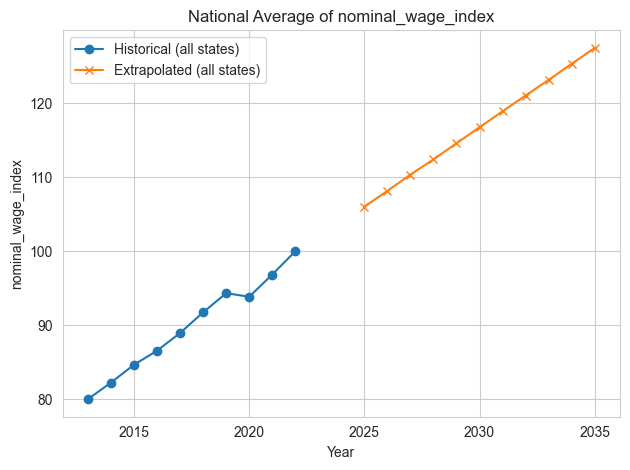

In [45]:
feature = 'nominal_wage_index'


# Historical national average
hist = historical_df.groupby('year_numeric')[feature].mean()

# Extrapolated national average
fut = BAU_10y.groupby('year_numeric')[feature].mean()

# Plot
plt.plot(hist.index, hist.values, label='Historical (all states)', marker='o')
plt.plot(fut.index, fut.values, label='Extrapolated (all states)', marker='x')
plt.title(f"National Average of {feature}")
plt.xlabel("Year")
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

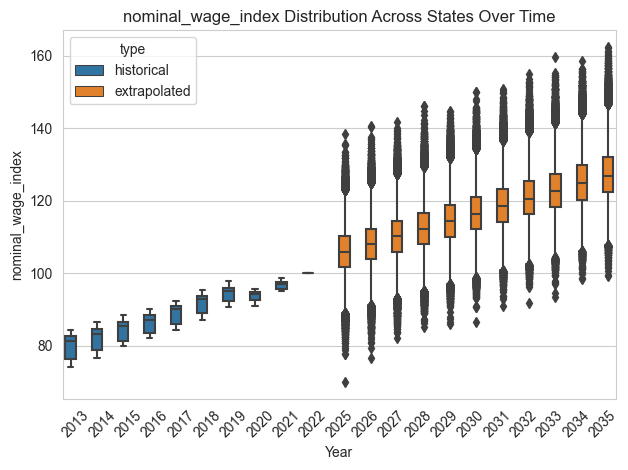

In [46]:
df = pd.concat([historical_df, BAU_10y])
df['type'] = df['year_numeric'].apply(lambda x: 'historical' if x < 2023 else 'extrapolated')

sns.boxplot(data=df, x='year_numeric', y=feature, hue='type')
plt.title(f"{feature} Distribution Across States Over Time")
plt.xlabel("Year")
plt.ylabel(feature)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
feature = 'education'

hist = historical_df.groupby('year_numeric')[feature].mean()
fut = BAU_10y.groupby('year_numeric')[feature].mean()

plt.plot(hist.index, hist.values, label='Historical', marker='o')
plt.plot(fut.index, fut.values, label='Extrapolated', marker='x')
plt.title(f"National Average Proportion: {feature}")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

***
# Model Prediction

In [51]:
import mlflow
mlflow.set_tracking_uri('http://mlflow.fa.berufsnavigator.de:5000')
run_id = 'da46f2fc452b4efa979b5ca28e23f992'
model = mlflow.xgboost.load_model(f'runs:/{run_id}/model')

TypeError: ColSpec.__init__() got an unexpected keyword argument 'required'